In [1]:
!git clone https://github.com/surajkadam727/Assignment.git

Cloning into 'Assignment'...
remote: Enumerating objects: 381, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 381 (delta 69), reused 78 (delta 36), pack-reused 230
Receiving objects: 100% (381/381), 41.46 MiB | 20.26 MiB/s, done.
Resolving deltas: 100% (145/145), done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('/content/Assignment/Assignment 7/EastWestAirlines.csv')

In [6]:
data

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [7]:
# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

In [8]:
#Set ID as Index Column
data.set_index('ID',inplace=True)
data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1       28143           0          1          1          1          174   
2       19244           0          1          1          1          215   
3       41354           0          1          1          1         4123   
4       14776           0          1          1          1          500   
5       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
4017    18476           0          1          1          1         8525   
4018    64385           0          1          1          1          981   
4019    73597           0          3          1          1        25447   
4020    54899           0          1          1          1          500   
4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1               1                  0                0               7000   
2               2                  0                0               6968   
3               4                  0                0               7034   
4               1                  0                0               6952   
5              26               2077                4               6935   
...           ...                ...              ...                ...   
4017            4                200                1               1403   
4018            5                  0                0               1395   
4019            8                  0                0               1402   
4020            1                500                1               1401   
4021            0                  0                0               1398   

      Award  
ID           
1         0  
2         0  
3         0  
4         0  
5         1  
...     ...  
4017      1  
4018      1  
4019      1  
4020      0  
4021      0  

[3999 rows x 11 columns]

In [9]:
data.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll        Award  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [11]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',data.cc1_miles.unique())
print('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [ ]:
# Missing Values

In [12]:
# As a part of the Data cleansing we check the data for any missing/ na values
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n", null_count_col, "\n")
print("Null Percentage for Columns:\n\n", null_percent_col)

Null Count for Columns:

 0    11
dtype: int64 

Null Percentage for Columns:

 0.0    11
dtype: int64


In [13]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Rows:\n\n", null_count_row, "\n")
print("Null Percentage for Rows:\n\n", null_percent_row)

Null Count for Rows:

 0    3999
dtype: int64 

Null Percentage for Rows:

 0.0    3999
dtype: int64


In [14]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
data.duplicated().sum()

1

In [16]:
data.drop_duplicates(data,inplace=True)

In [18]:
data.duplicated().sum()

0

In [ ]:
# Lets analyze the features by creating histograms to understand the distribution

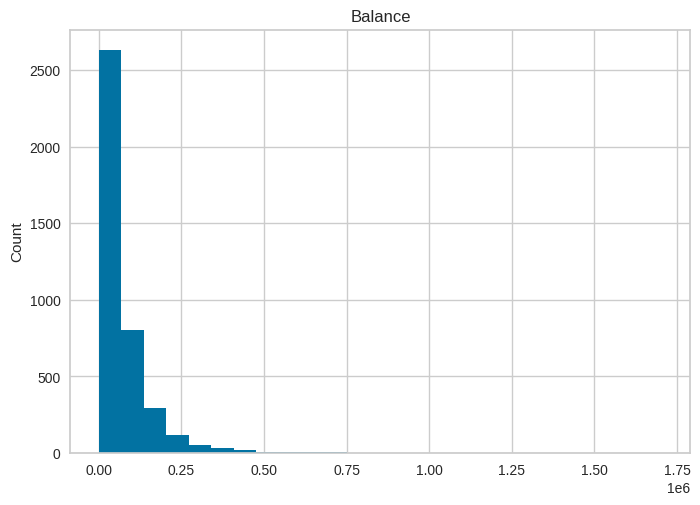

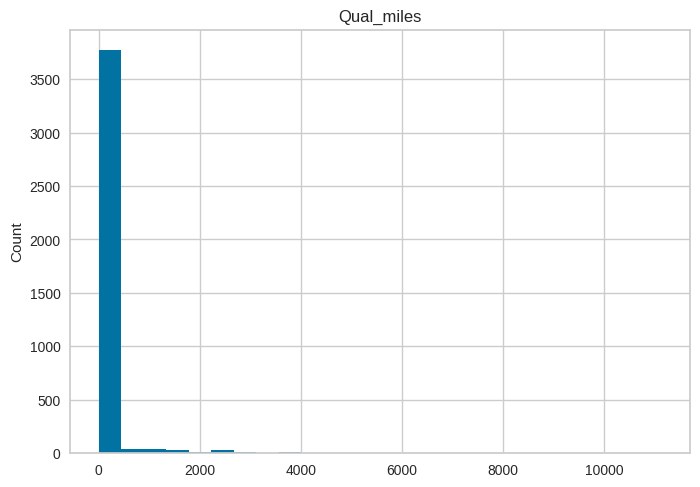

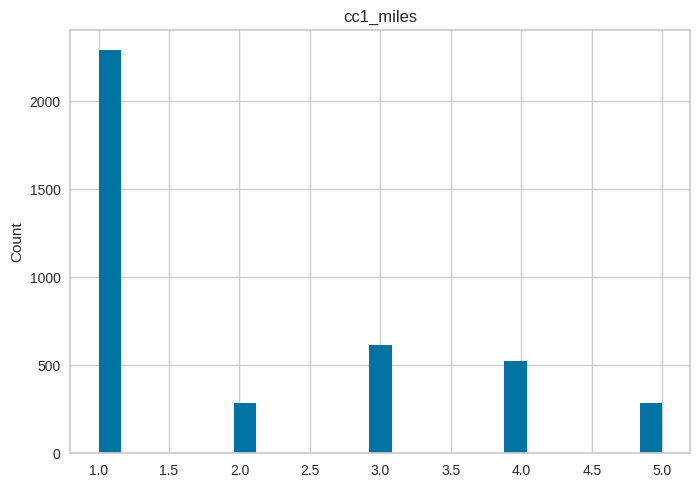

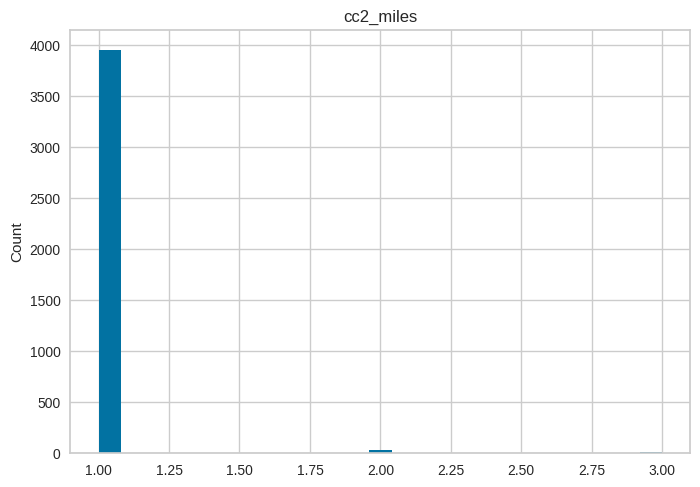

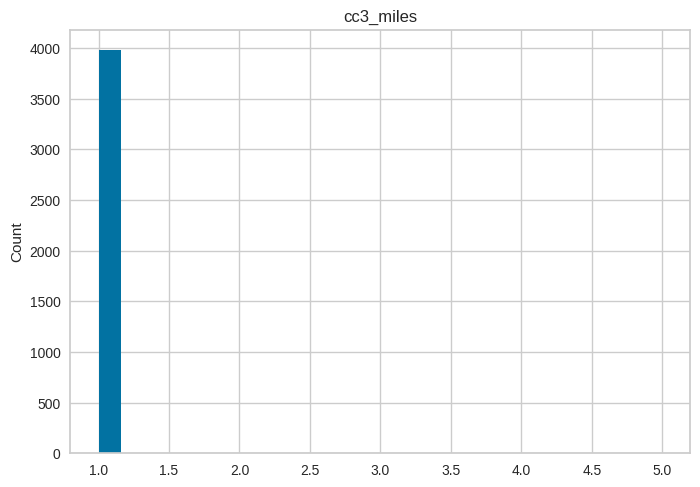

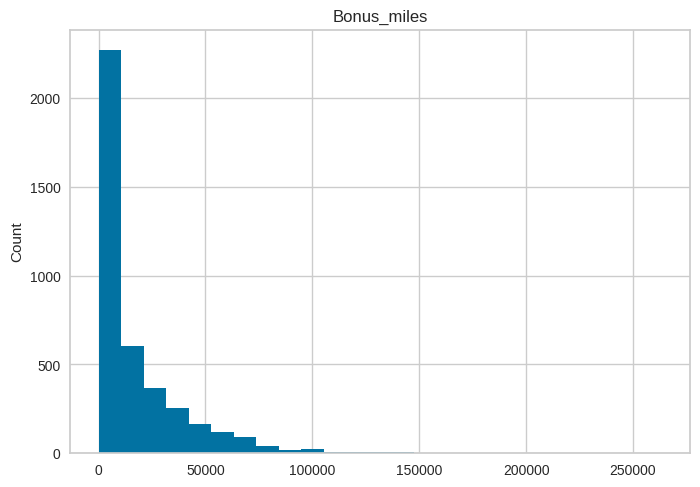

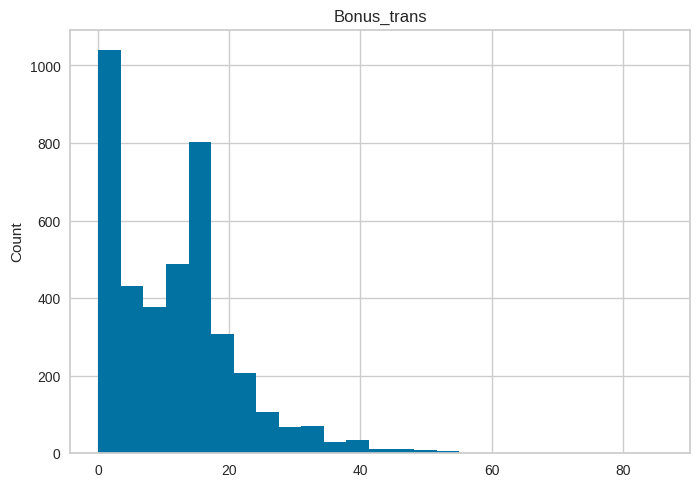

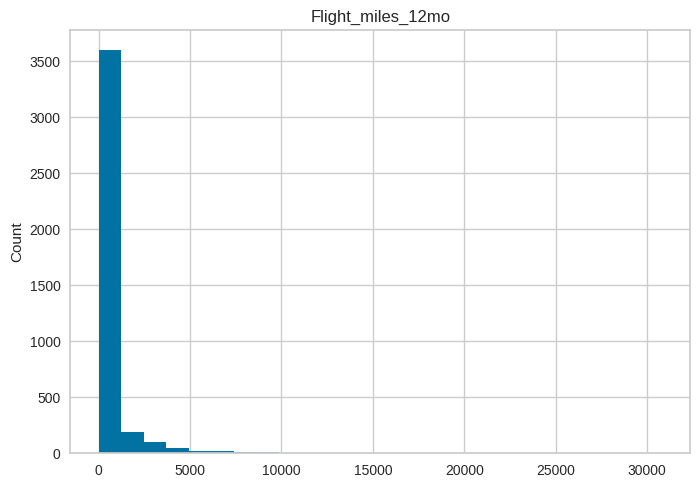

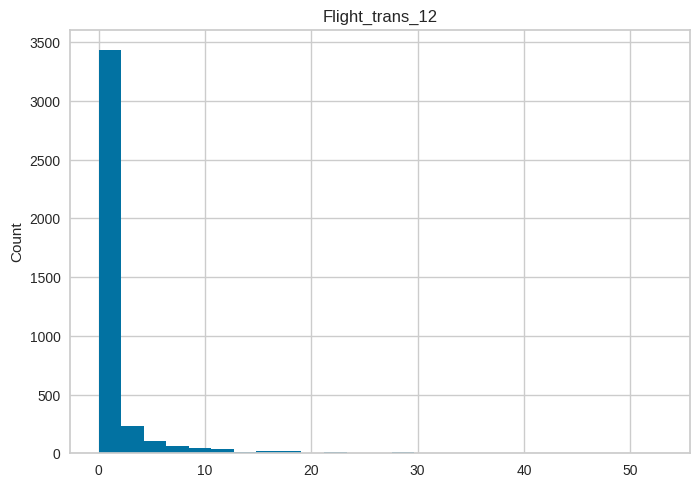

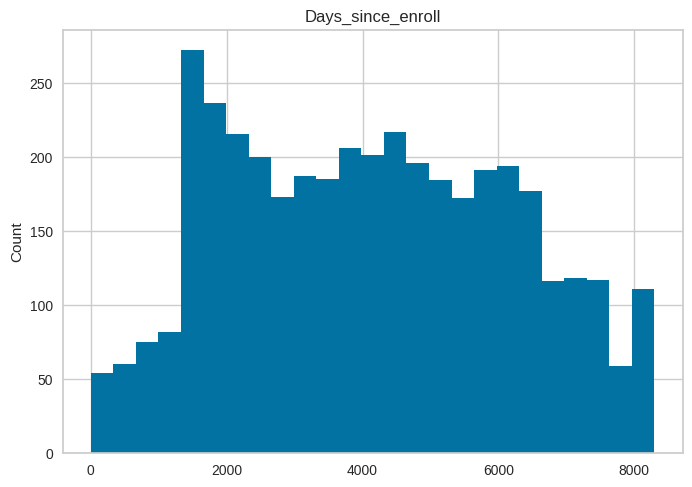

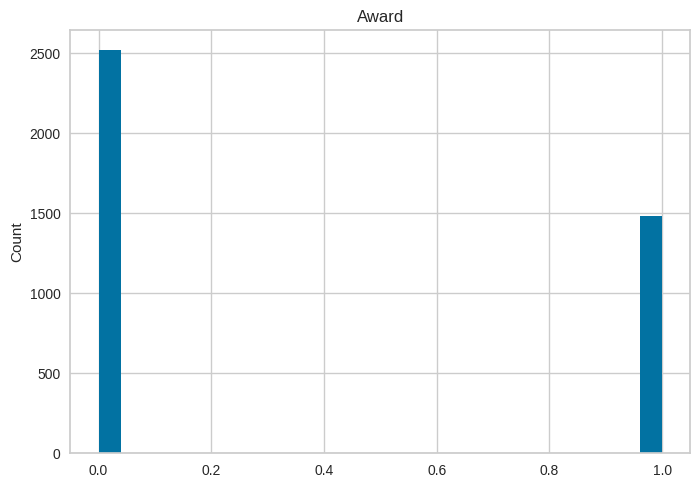

In [21]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Balance


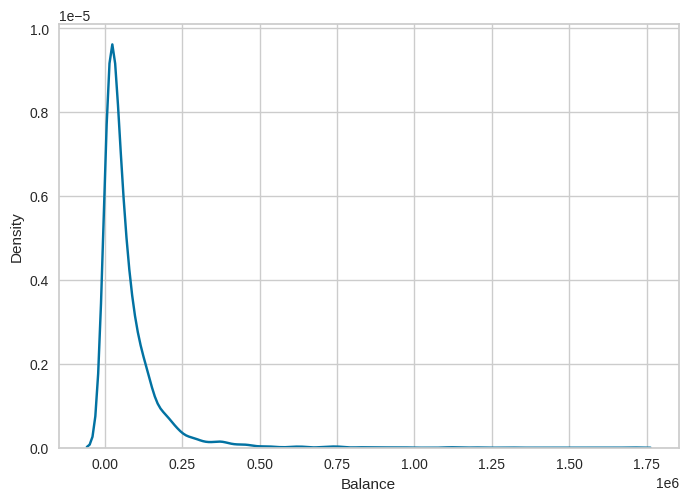

Qual_miles


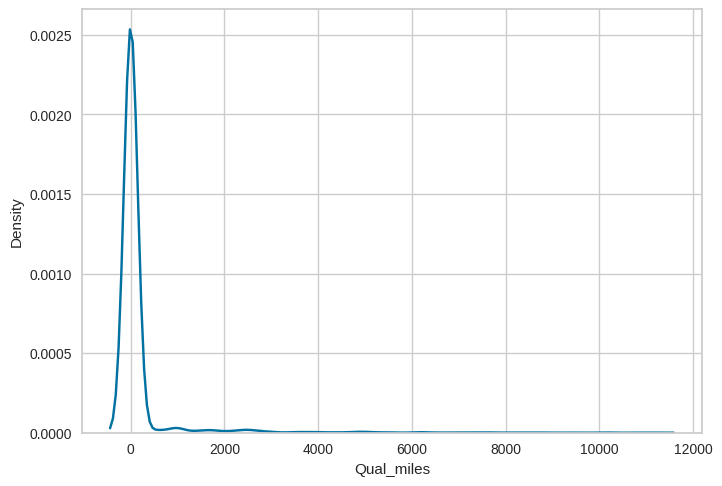

cc1_miles


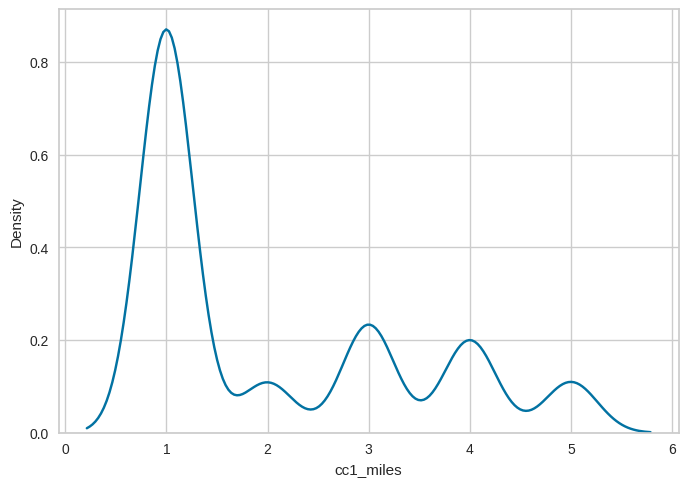

cc2_miles


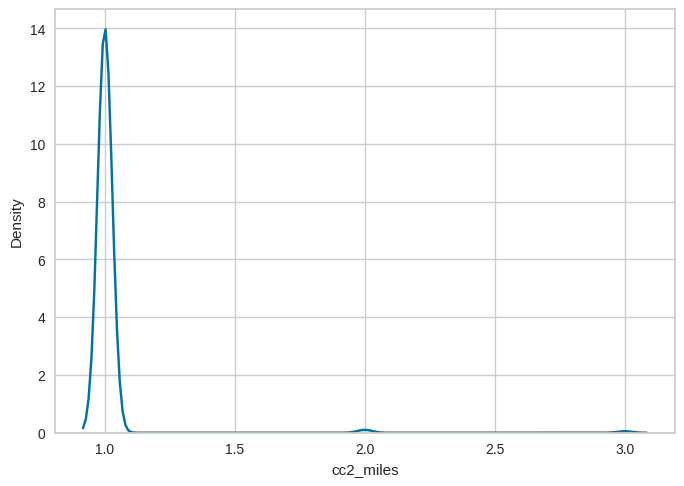

cc3_miles


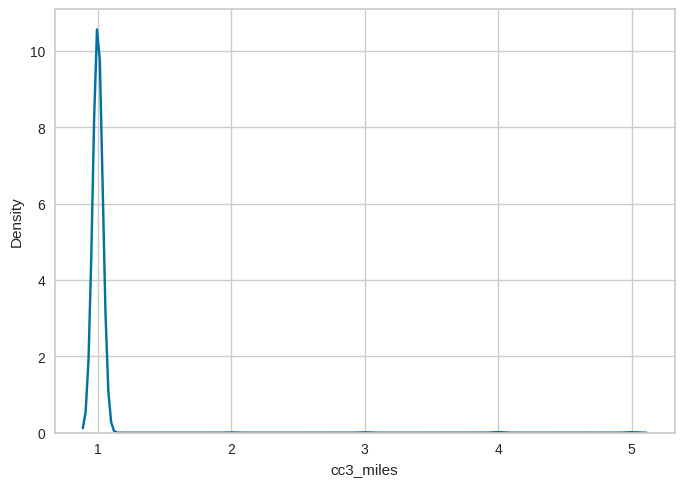

Bonus_miles


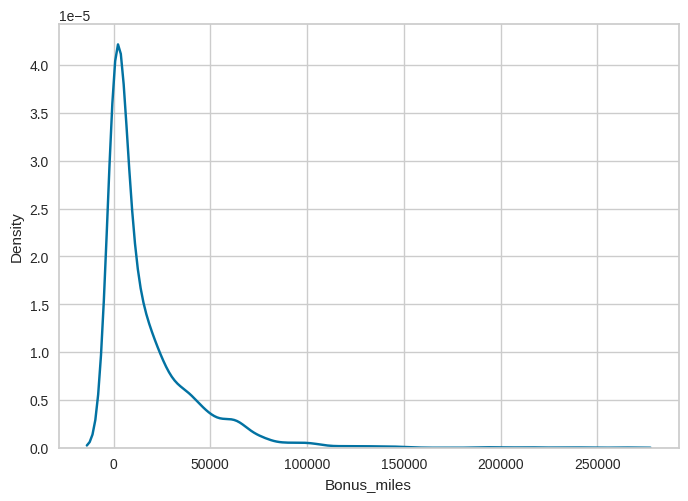

Bonus_trans


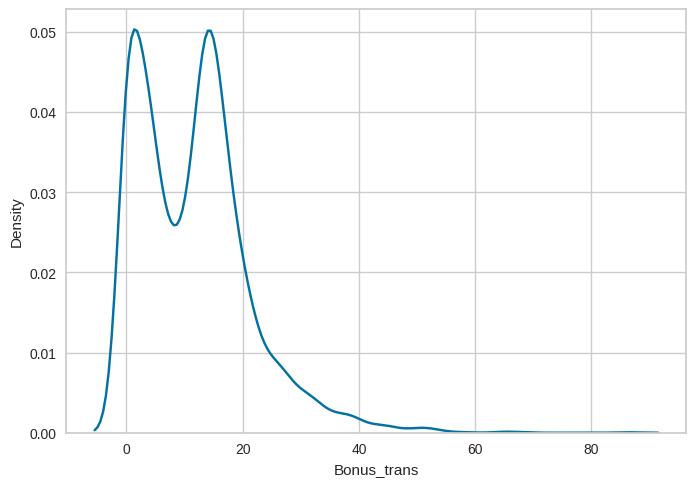

Flight_miles_12mo


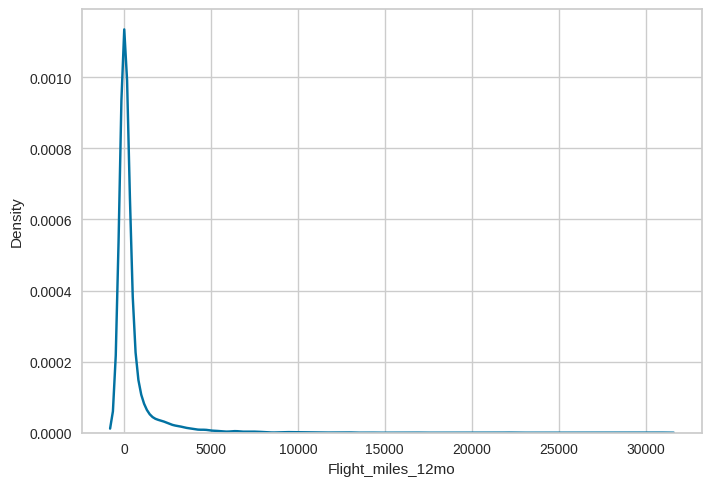

Flight_trans_12


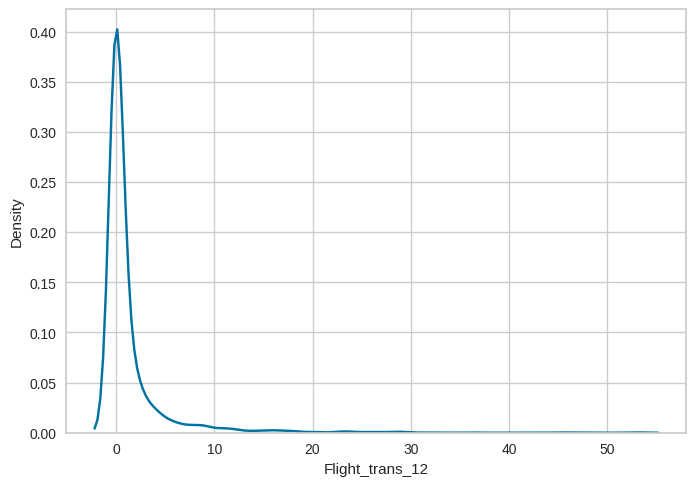

Days_since_enroll


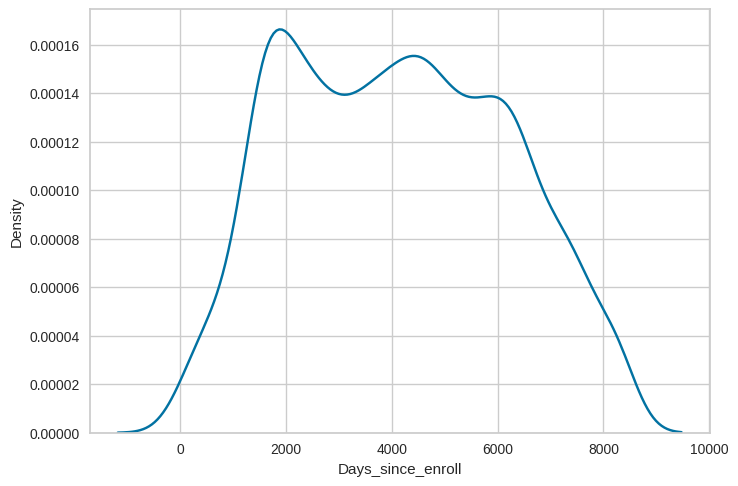

Award


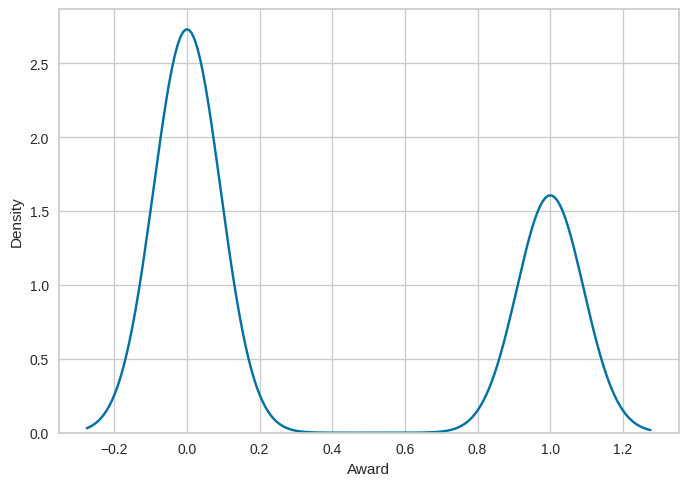

In [22]:
  # Kernel Density for every feature, singled out

for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

In [ ]:
#  Outliers Detection

In [23]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

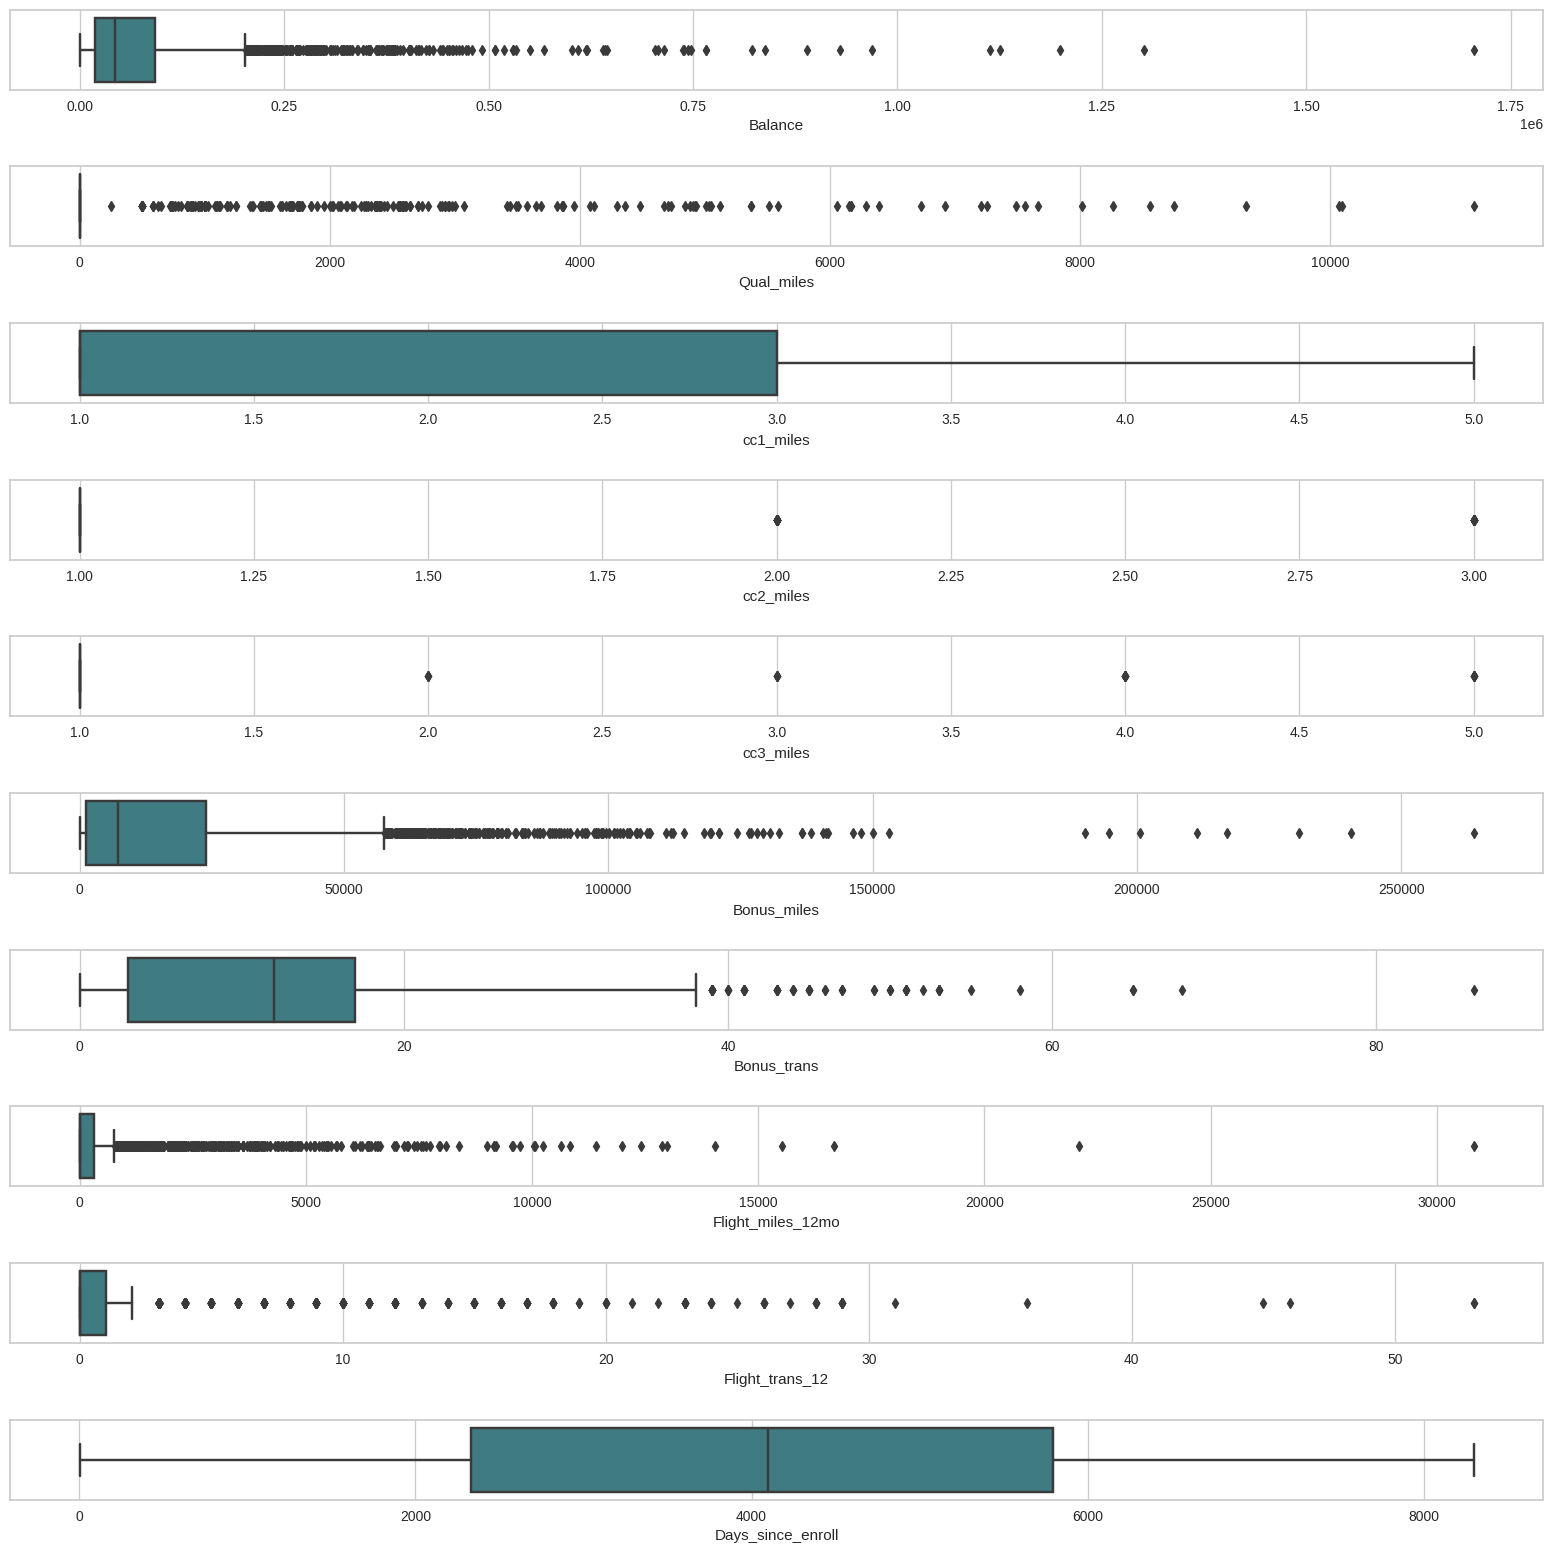

In [24]:
ot=data.copy()
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<Axes: >

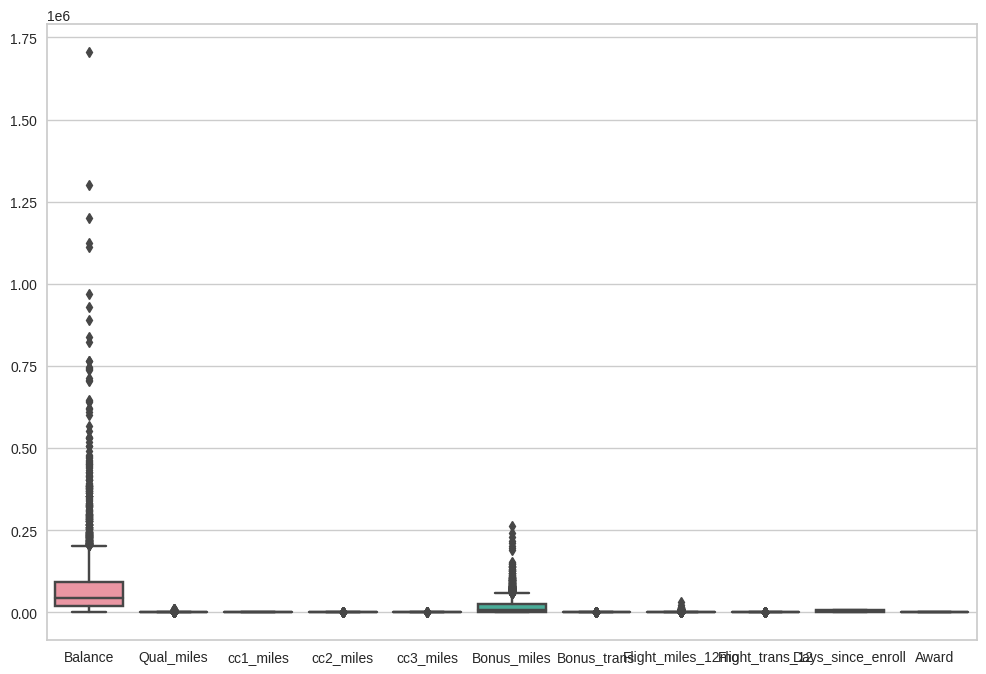

In [25]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

<Axes: >

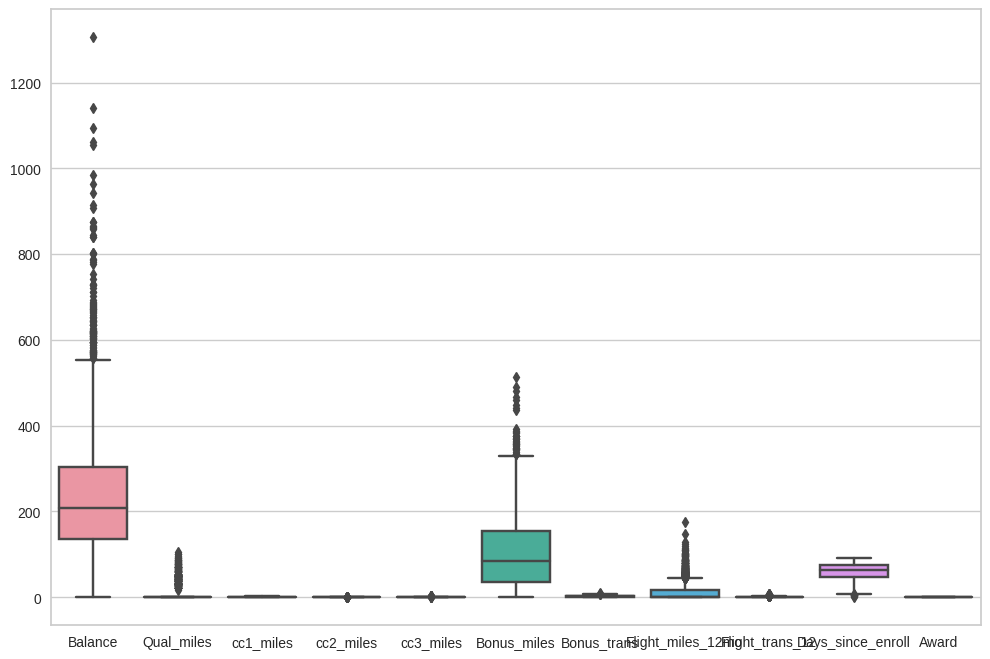

In [26]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

In [27]:
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.96%
Percentage of Customer does have a Award: 37.04%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

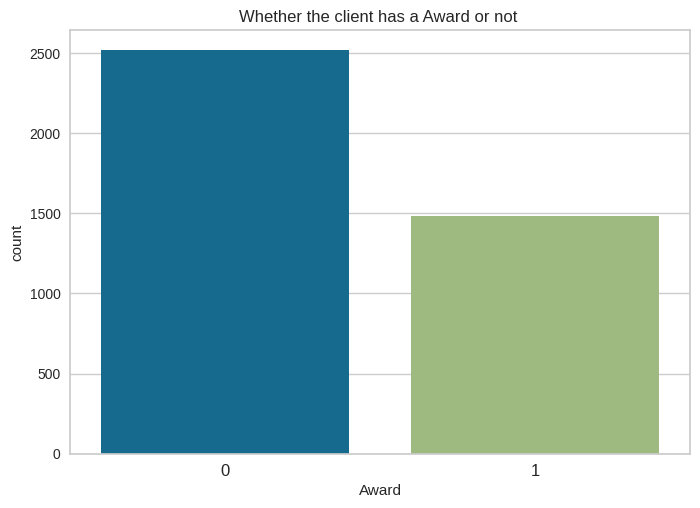

In [28]:
sns.countplot(x='Award', data=data,
              order=data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

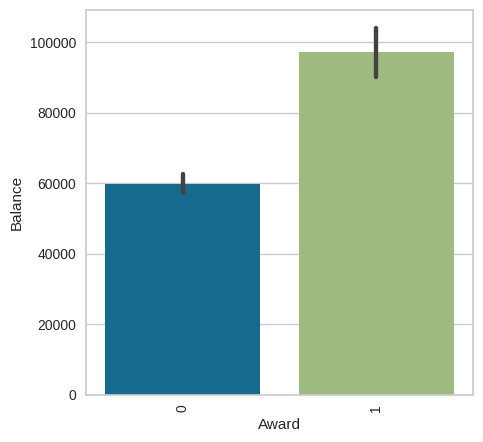

In [29]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [30]:
# what is correlated with Balance?

corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
Award                0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
Name: Balance, dtype: float64

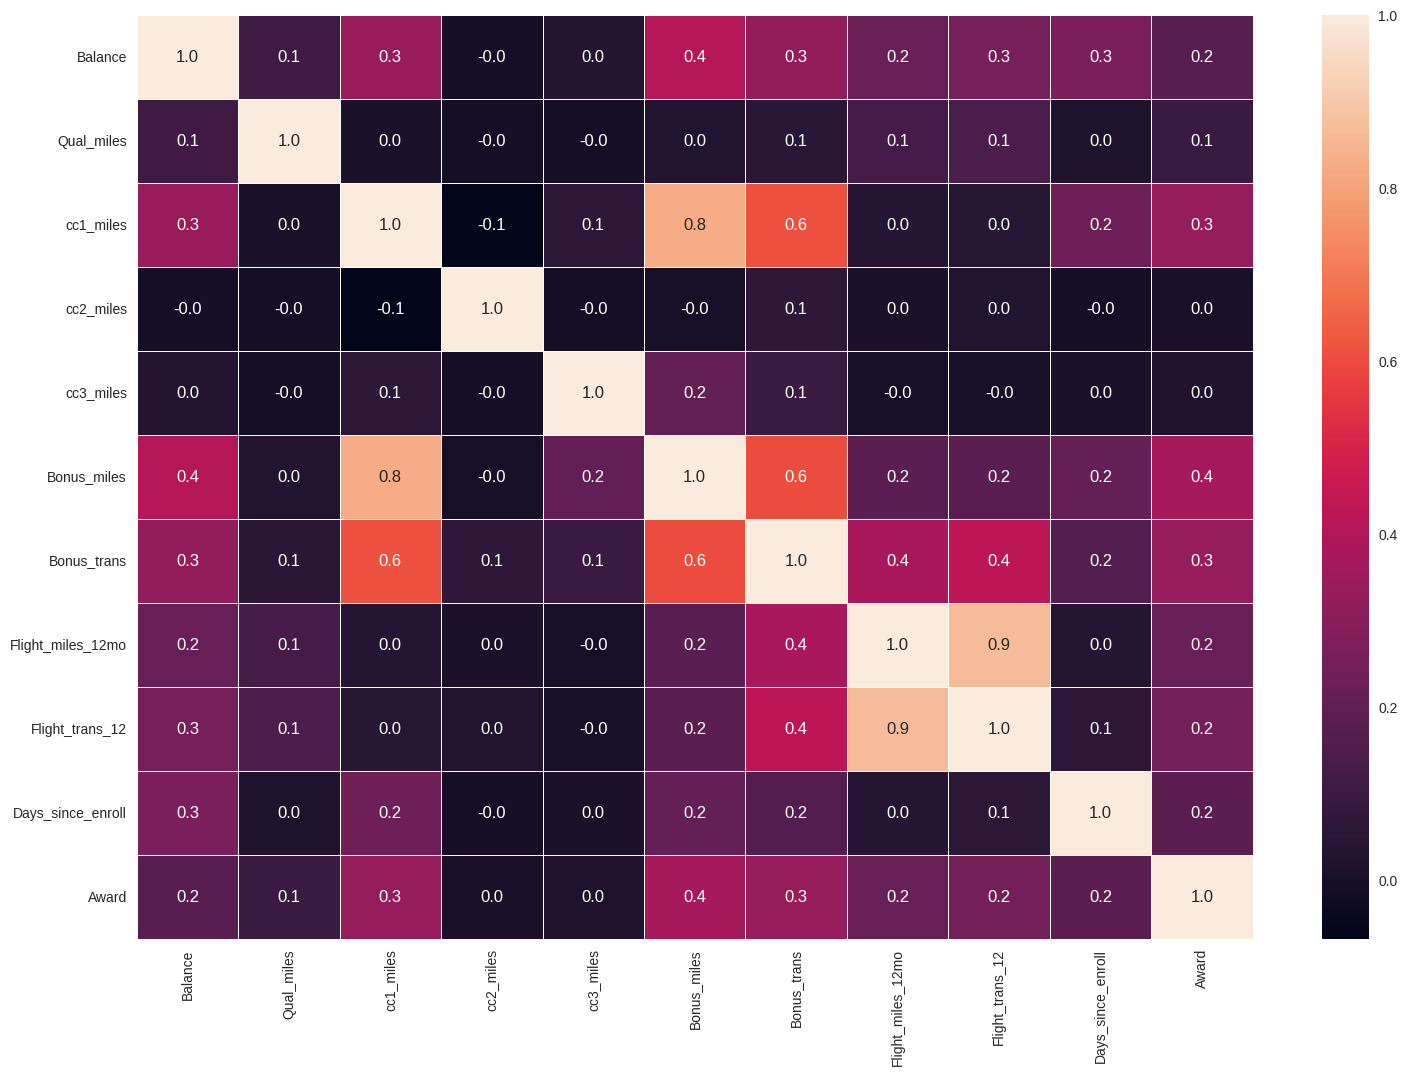

In [32]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

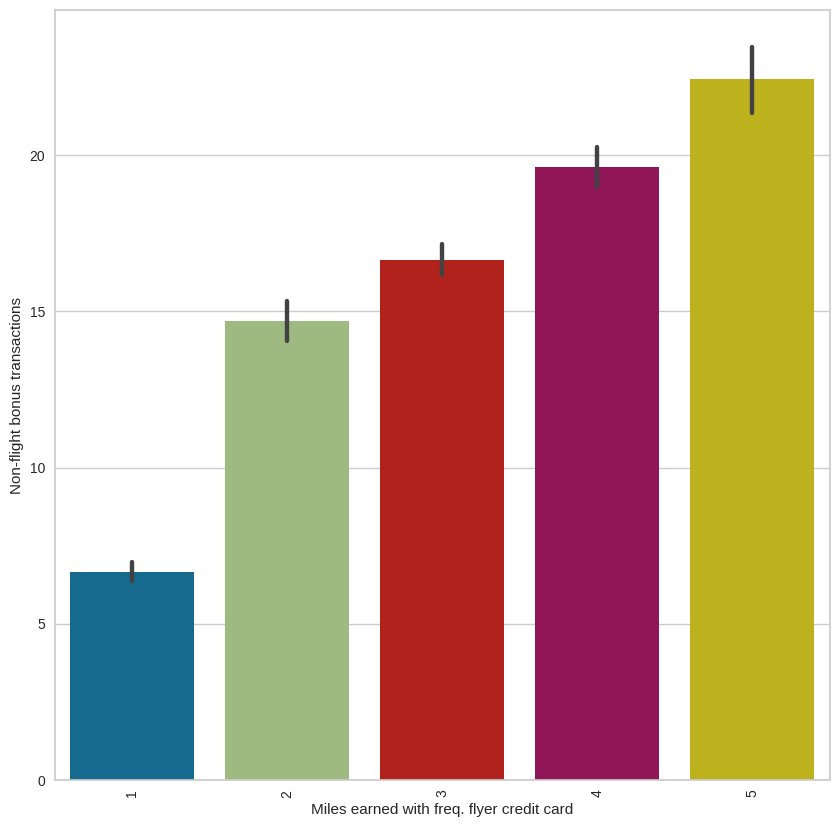

In [33]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

People who fly more frequently use bonus transactions more

In [ ]:
# Standardizing the Data
#  Table of Contents

In [34]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3998, 11)

In [35]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 11)

In [ ]:
#  KMeans Clustering

Elbow Method for Determining Cluster Amount
Standard Scaler Applied on Data

In [36]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0              1    43978.000000
1              2    35402.348376
2              3    30893.140330
3              4    27156.275121
4              5    24536.866902
5              6    21086.411285
6              7    19163.129196
7              8    17315.470336
8              9    15965.256906
9             10    14726.149031
10            11    13706.462669
11            12    12945.614273
12            13    12423.145132
13            14    11906.986522

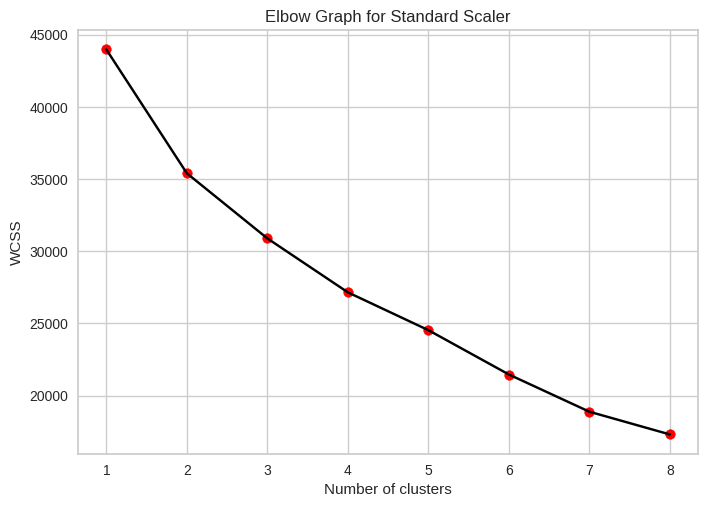

In [37]:
# within-cluster sum-of-squares criterion
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change.

wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#  Silhouette Score

In [38]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(std_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(std_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

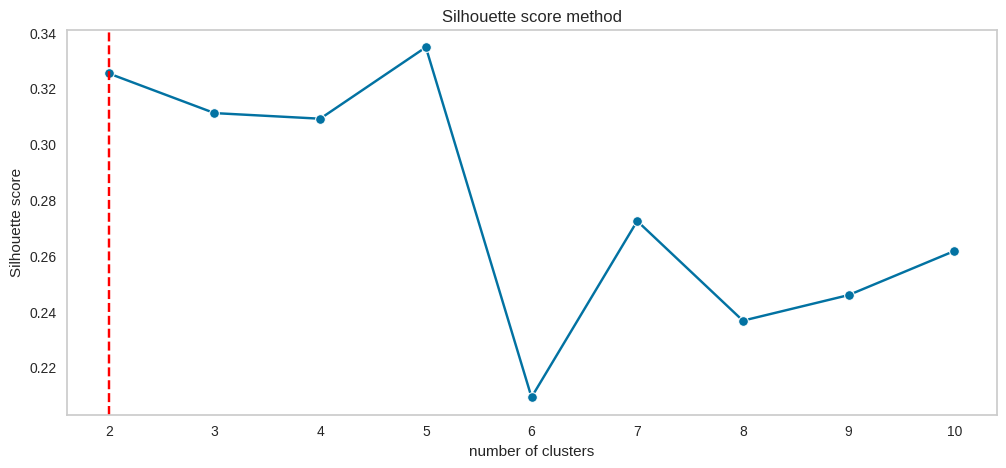

In [40]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Silhouette score method indicates the best options would be respectively 2 clusters.

Elbow Plot for Standard Scaler data


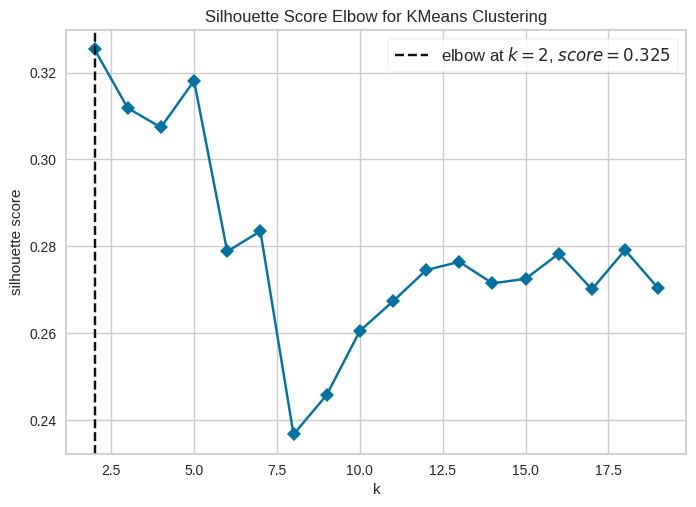

In [41]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)
visualizer.poof()
plt.show()

In [42]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.32531882107641713
For n_clusters = 3 The average silhouette_score is : 0.3120743629337082
For n_clusters = 4 The average silhouette_score is : 0.31003837126661404
For n_clusters = 5 The average silhouette_score is : 0.32371282485521125
For n_clusters = 6 The average silhouette_score is : 0.33378006995858245
For n_clusters = 7 The average silhouette_score is : 0.22365222966492318
For n_clusters = 8 The average silhouette_score is : 0.237314726017899
For n_clusters = 9 The average silhouette_score is : 0.24489425763143474


For n_clusters = 2 The average silhouette_score is : 0.32531882107641713
For n_clusters = 3 The average silhouette_score is : 0.3120743629337082
For n_clusters = 4 The average silhouette_score is : 0.31003837126661404
For n_clusters = 5 The average silhouette_score is : 0.32371282485521125
For n_clusters = 6 The average silhouette_score is : 0.33378006995858245
For n_clusters = 7 The average silhouette_score is : 0.22365222966492318
For n_clusters = 8 The average silhouette_score is : 0.237314726017899
For n_clusters = 9 The average silhouette_score is : 0.24489425763143474


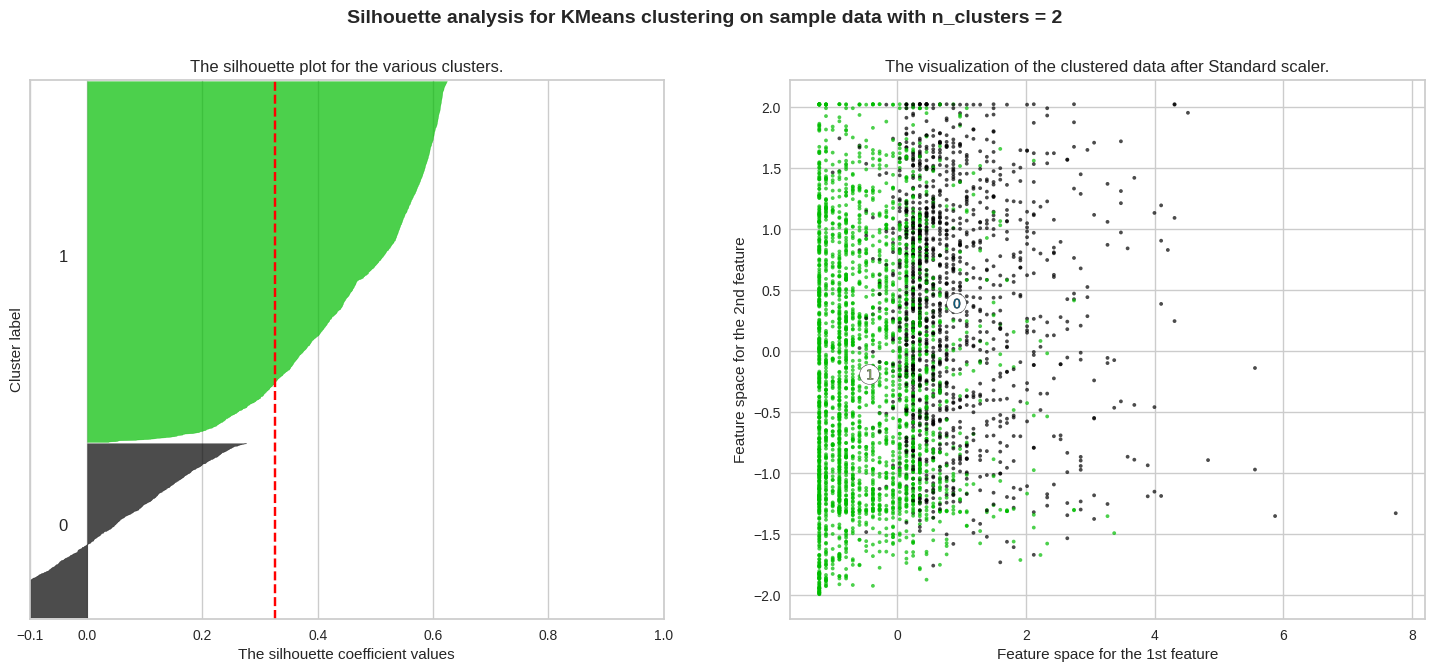

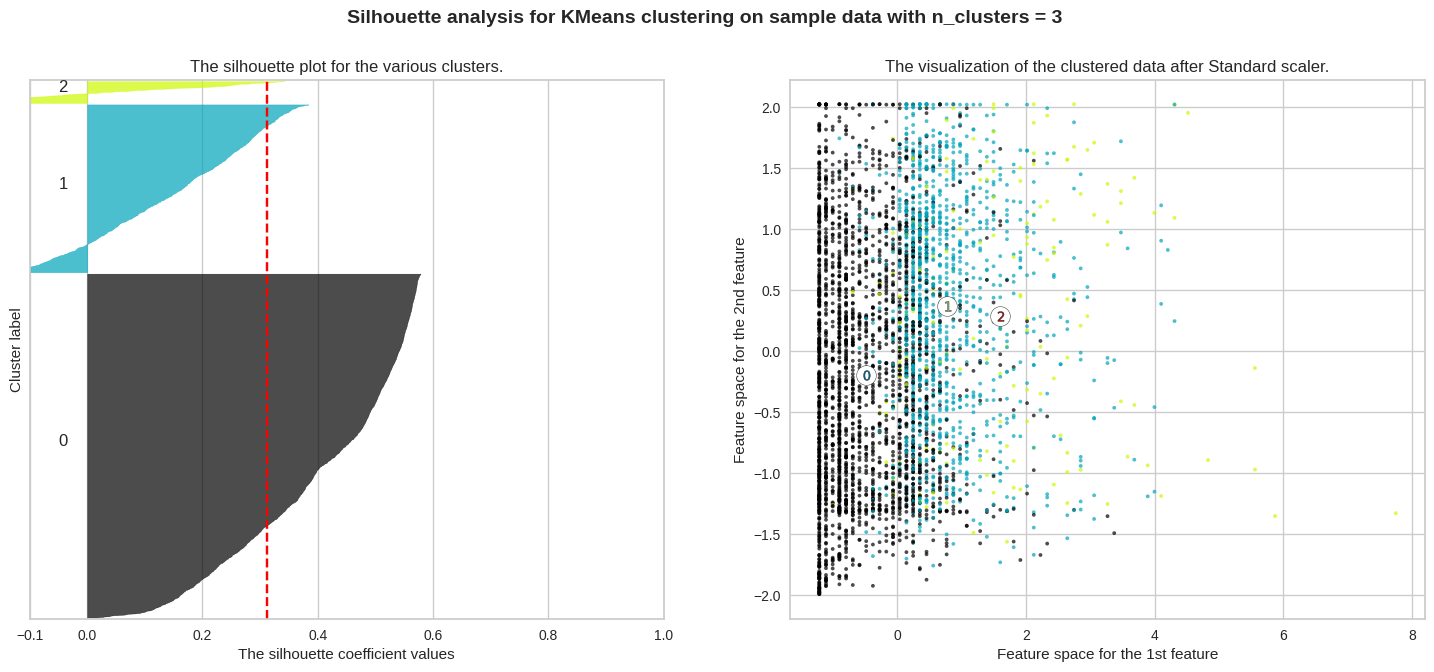

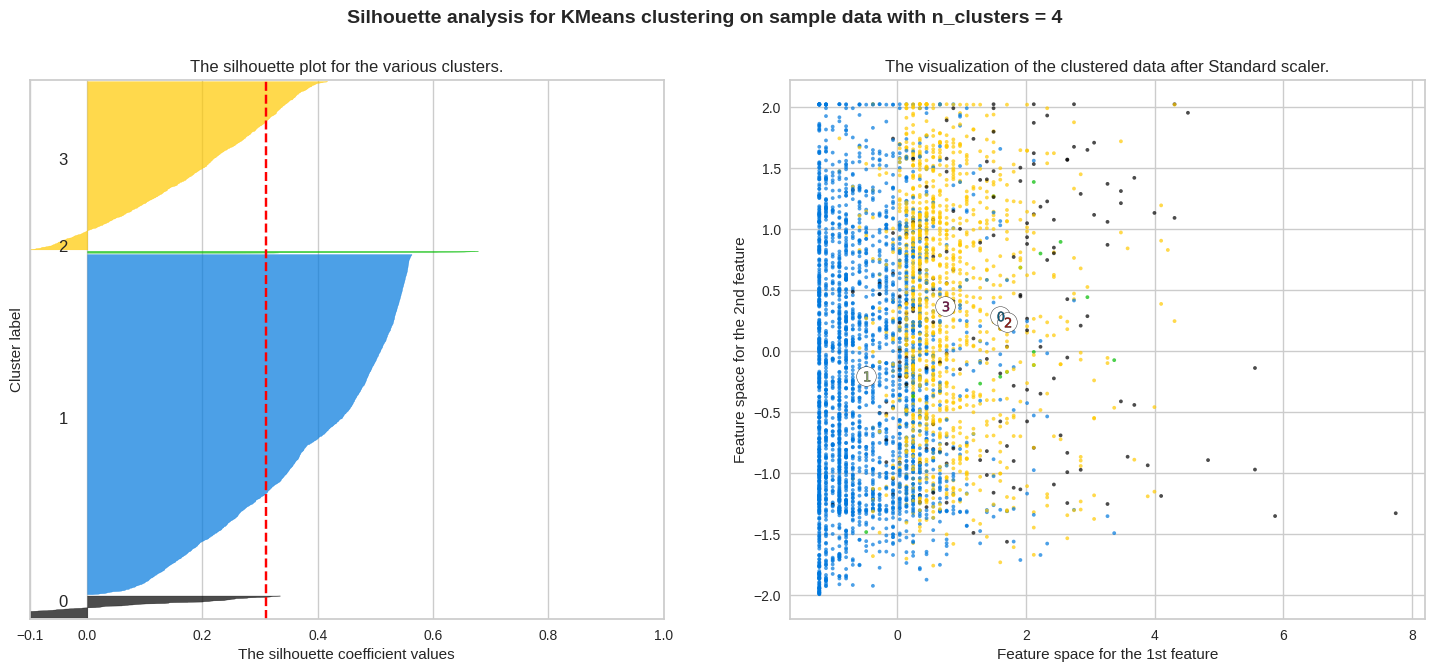

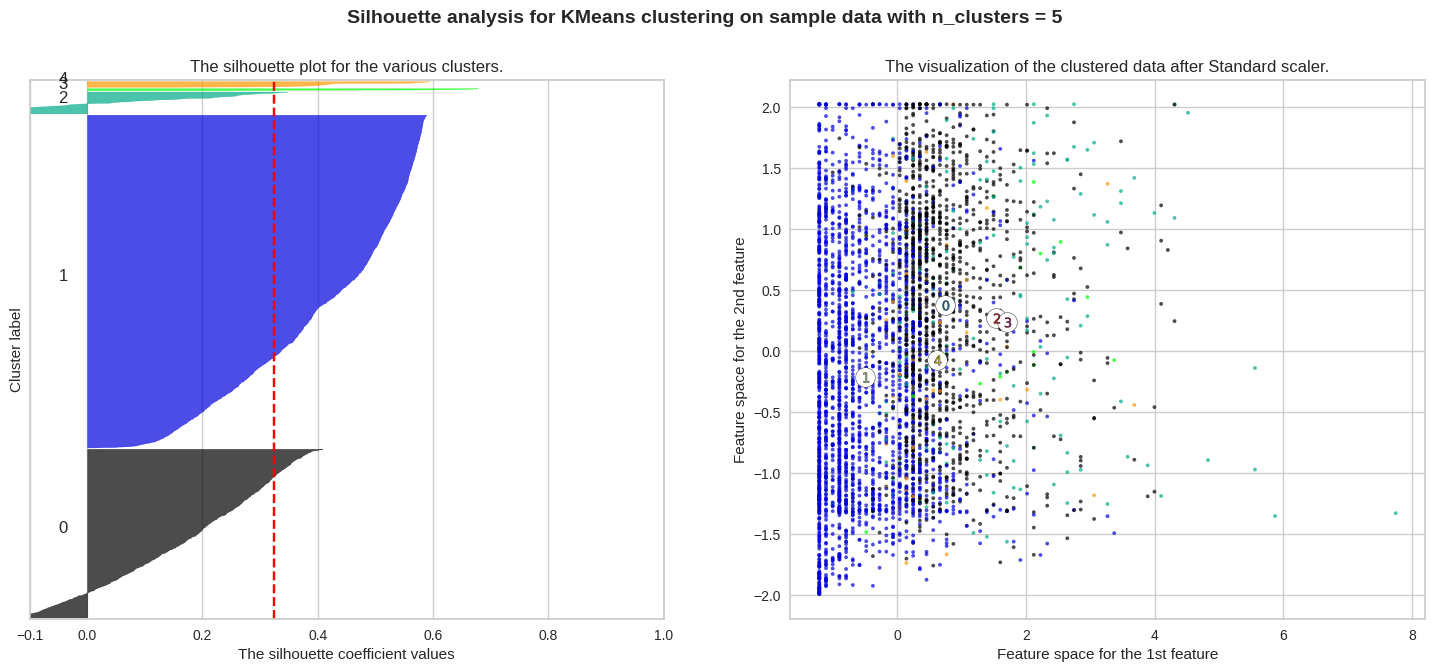

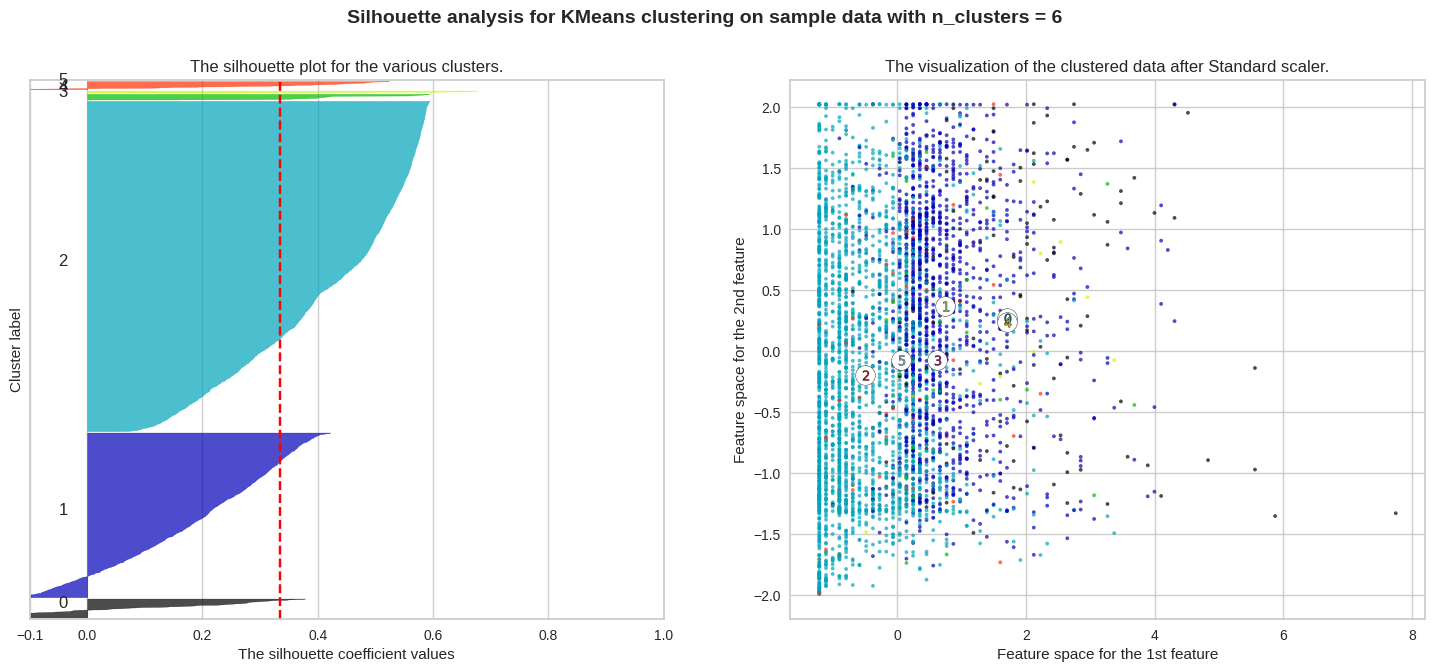

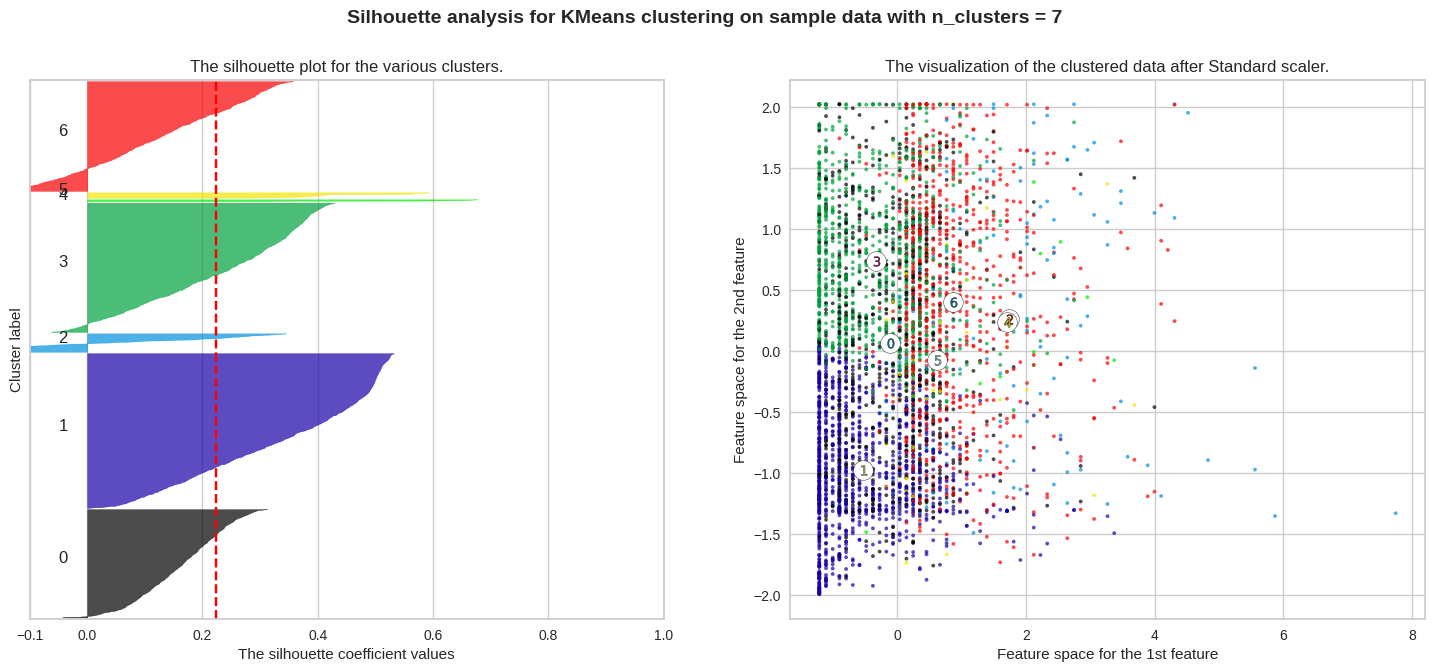

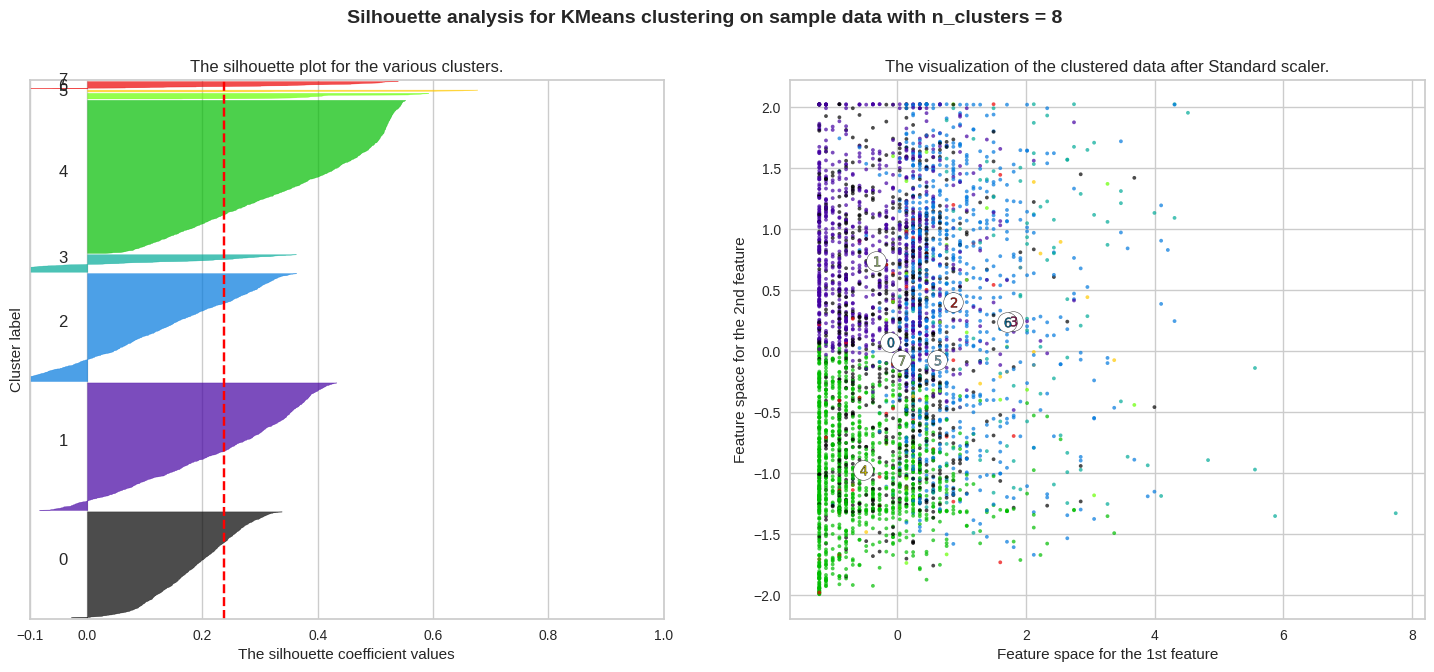

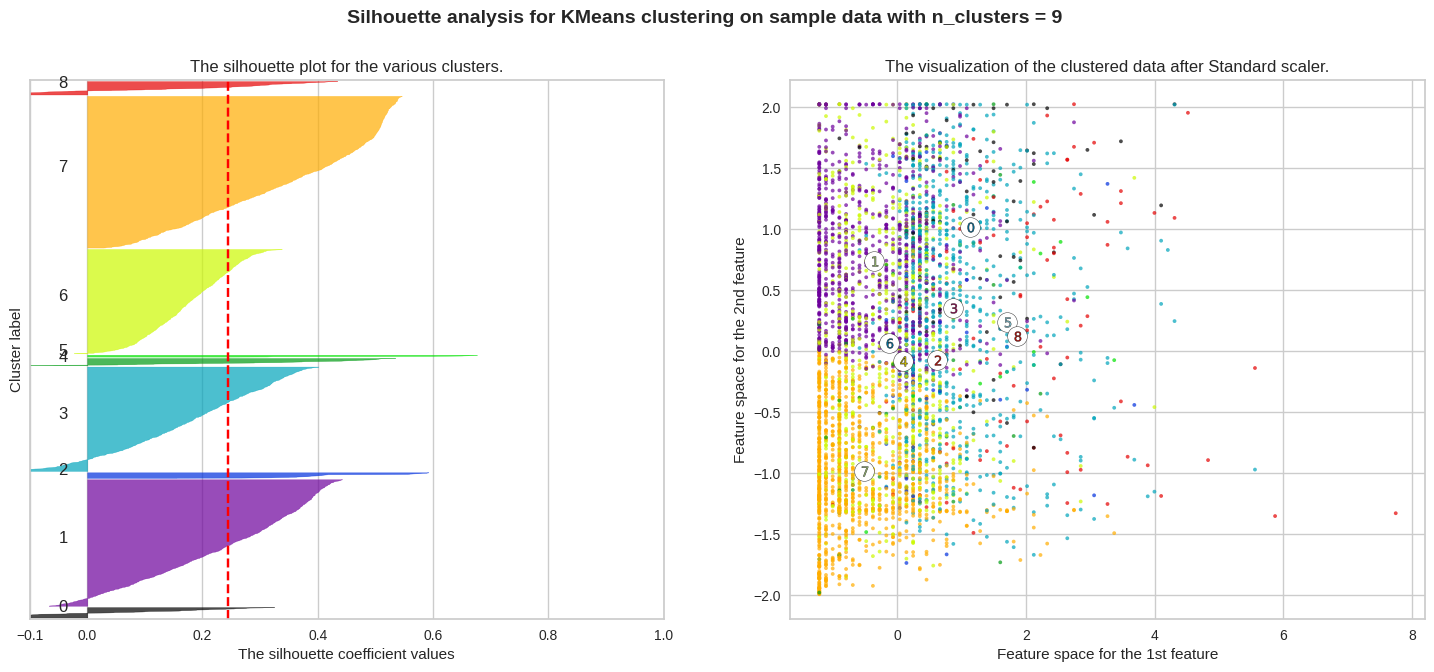

In [43]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

According the the silhouette score of:

The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.33

In [ ]:
# Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset

In [44]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model_kmeans = KMeans(n_clusters=6, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3998,)

In [45]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [46]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [47]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 1.13661978,  0.41416471,  0.13434996, -0.09825429, -0.06277446,
         0.6561826 ,  1.70528239,  3.77057434,  4.00160023,  0.27124922,
         0.88372079],
       [ 0.43360655, -0.11304557,  1.20989562, -0.09825429, -0.05450669,
         0.92790005,  0.75243243, -0.08073137, -0.0896464 ,  0.37051107,
         0.57831847],
       [-0.2944391 , -0.12884258, -0.6016064 , -0.09825429, -0.06072325,
        -0.51689575, -0.49353627, -0.18636708, -0.19846289, -0.19781849,
        -0.34994003],
       [-0.04706705, -0.15626333, -0.66838569,  9.03710982, -0.06277446,
        -0.1018366 ,  0.61758448,  0.08745745,  0.22023229, -0.0727739 ,
         0.0515894 ],
       [ 0.63950059, -0.08446932,  1.02183982, -0.09825429, 15.64433492,
         3.1793166 ,  1.7144102 ,  0.0332068 ,  0.05959833,  0.2395819 ,
         0.33731815],
       [ 0.45689596,  6.73023291, -0.0434189 , -0.09825429, -0.06277446,
         0.06353524,  0.06505958,  0.3595715 ,  0.39411338, -0.07153328,
         0.387

In [ ]:
# within-cluster sum of squared
# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster.
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

In [48]:
model_kmeans.inertia_


21086.325857898286

In [62]:
data['Kmeans_label'] = model_kmeans.labels_

In [64]:
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1     28143           0          1          1          1          174   
2     19244           0          1          1          1          215   
3     41354           0          1          1          1         4123   
4     14776           0          1          1          1          500   
5     97752           0          4          1          1        43300   

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1             1                  0                0               7000      0   
2             2                  0                0               6968      0   
3             4                  0                0               7034      0   
4             1                  0                0               6952      0   
5            26               2077                4               6935      1   

    Kmeans_label  
ID                
1              2  
2              2  
3              2  
4              2  
5              1

In [65]:
# Group data by Clusters (K=6)
data.groupby('Kmeans_label').agg(['mean'])

Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                       mean         mean      mean      mean      mean   
Kmeans_label                                                             
0             188155.664336   464.573427  2.244755  1.000000  1.000000   
1             117176.916331    58.446500  3.720837  1.000000  1.001609   
2              43899.574007    43.575612  1.229844  1.000000  1.000401   
3              68876.581395    23.255814  1.139535  2.348837  1.000000   
4             138061.400000    78.800000  3.466667  1.000000  4.066667   
5             119660.491803  5351.065574  2.000000  1.000000  1.000000   

               Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                      mean        mean              mean            mean   
Kmeans_label                                                               
0             32995.580420   27.979021       5739.692308       16.552448   
1             39485.872084   18.811746        346.617860        1.032180   
2              4646.073004    6.855596        199.240273        0.621340   
3             14689.837209   17.534884        582.627907        2.209302   
4             93927.866667   28.066667        506.666667        1.600000   
5             18683.475410   12.229508        963.639344        2.868852   

             Days_since_enroll     Award  
                          mean      mean  
Kmeans_label                              
0                  4679.251748  0.797203  
1                  4887.485921  0.649236  
2                  3707.224629  0.200963  
3                  3968.930233  0.395349  
4                  4613.866667  0.533333  
5                  3971.491803  0.557377

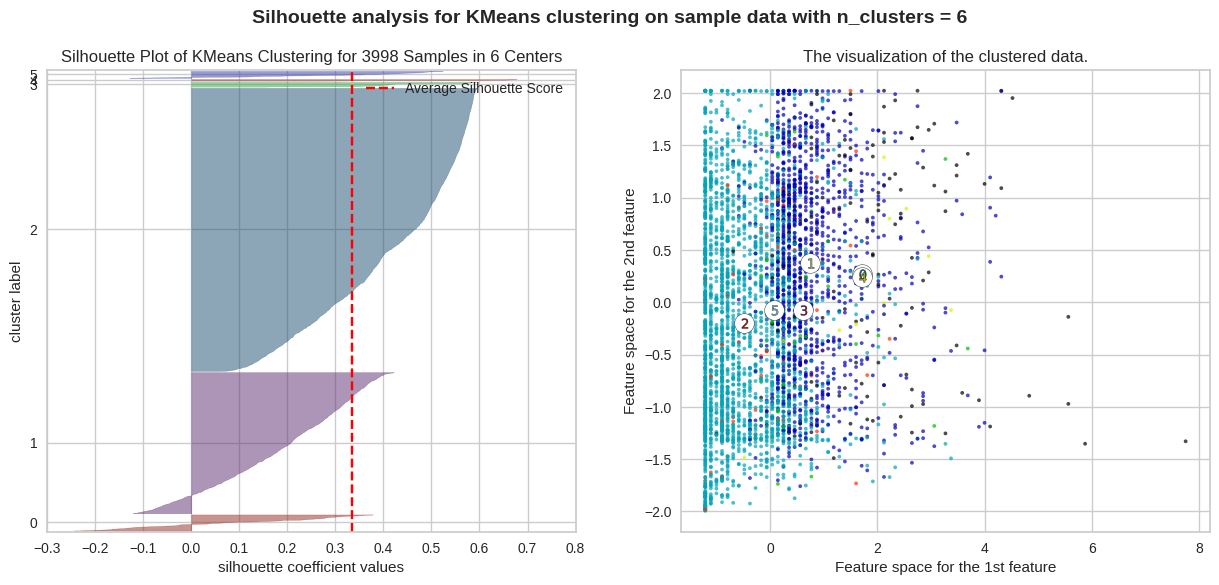

In [66]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(std_df[:, 6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [ ]:
#  Elbow Method and Silhouette Score on MinMaxScaler Applied Data

In [68]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(minmax_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0              1     1830.468023
1              2      823.558363
2              3      625.101720
3              4      436.642089
4              5      348.934750
5              6      315.286936
6              7      287.719081
7              8      263.205116
8              9      250.797219
9             10      226.103611
10            11      216.652522
11            12      204.020097
12            13      197.012004
13            14      190.794652

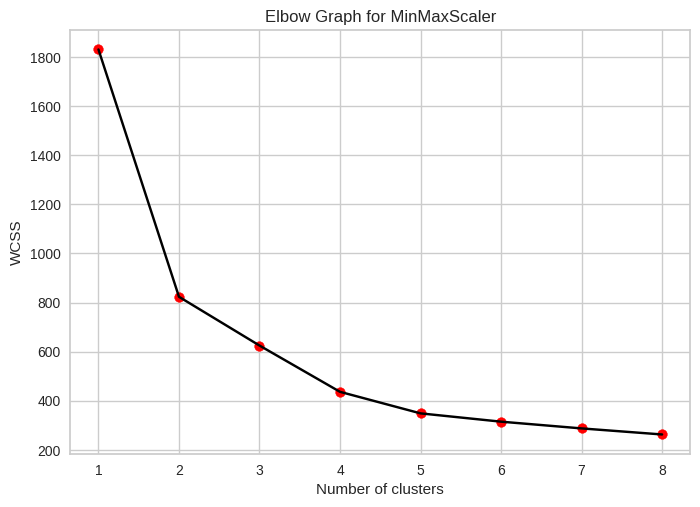

In [69]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

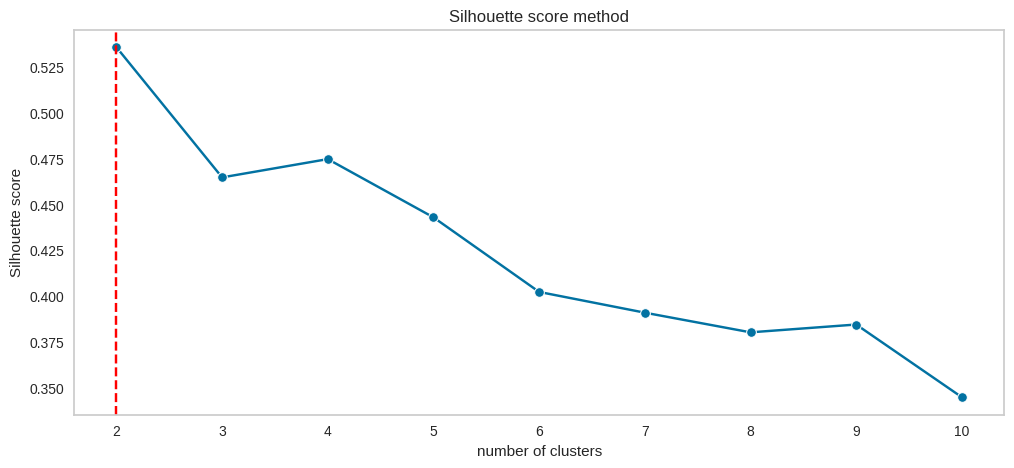

In [71]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(minmax_df)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(minmax_df, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Elbow Plot for MinMaxScaler data


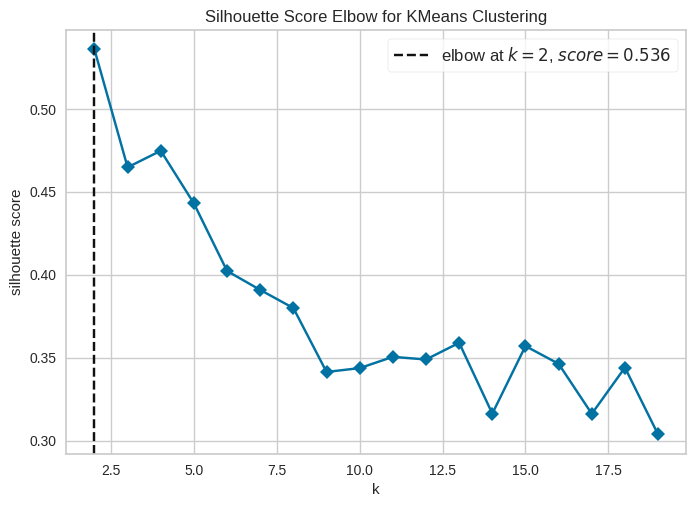

In [72]:
# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for MinMaxScaler data')
visualizer.fit(minmax_df)
visualizer.poof()
plt.show()

In [73]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(minmax_df)
    sil_score1= sil(minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.535888544052936
For n_clusters = 3 The average silhouette_score is : 0.46479982811211207
For n_clusters = 4 The average silhouette_score is : 0.47479527849897574
For n_clusters = 5 The average silhouette_score is : 0.4429787795230887
For n_clusters = 6 The average silhouette_score is : 0.4036935704266899
For n_clusters = 7 The average silhouette_score is : 0.3902543534131159
For n_clusters = 8 The average silhouette_score is : 0.3800928436109383
For n_clusters = 9 The average silhouette_score is : 0.38422218036747746


For n_clusters = 2 The average silhouette_score is : 0.535888544052936
For n_clusters = 3 The average silhouette_score is : 0.46479982811211207
For n_clusters = 4 The average silhouette_score is : 0.47479527849897574
For n_clusters = 5 The average silhouette_score is : 0.4429787795230887
For n_clusters = 6 The average silhouette_score is : 0.40225452242902543
For n_clusters = 7 The average silhouette_score is : 0.3908365897205473
For n_clusters = 8 The average silhouette_score is : 0.379901520230827
For n_clusters = 9 The average silhouette_score is : 0.3413462044075975


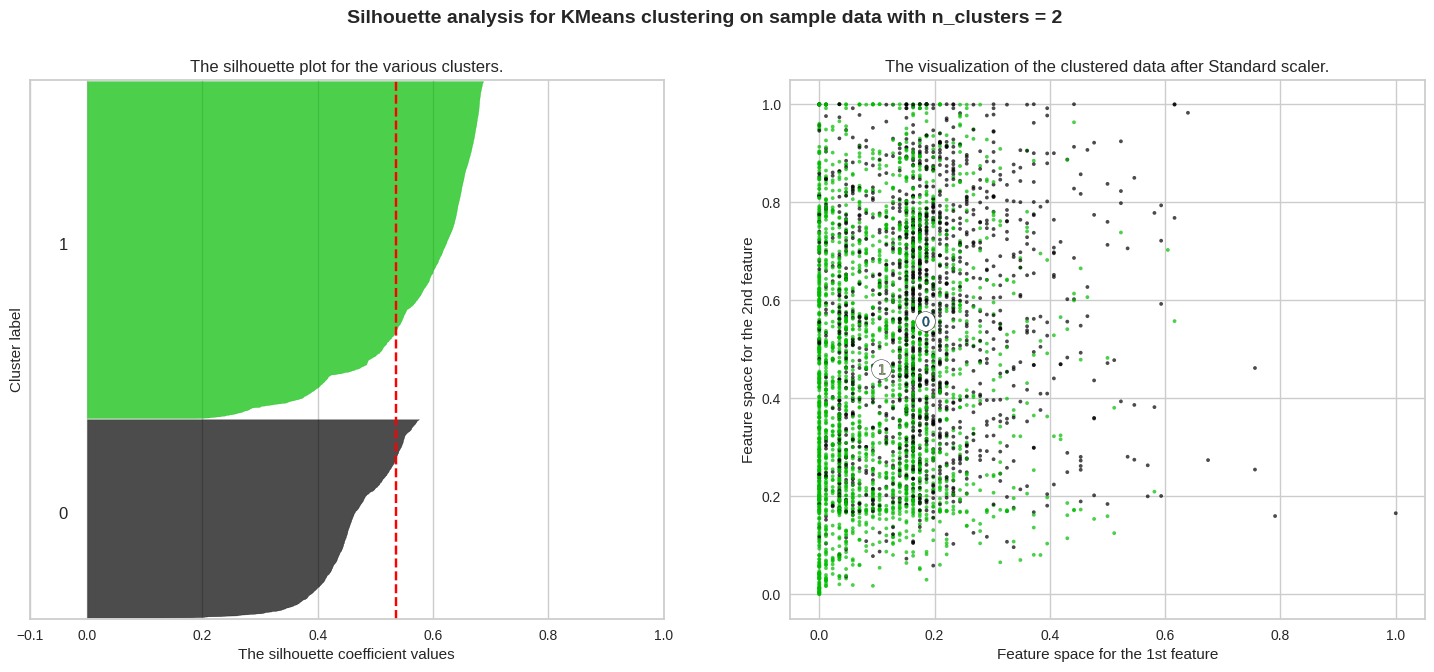

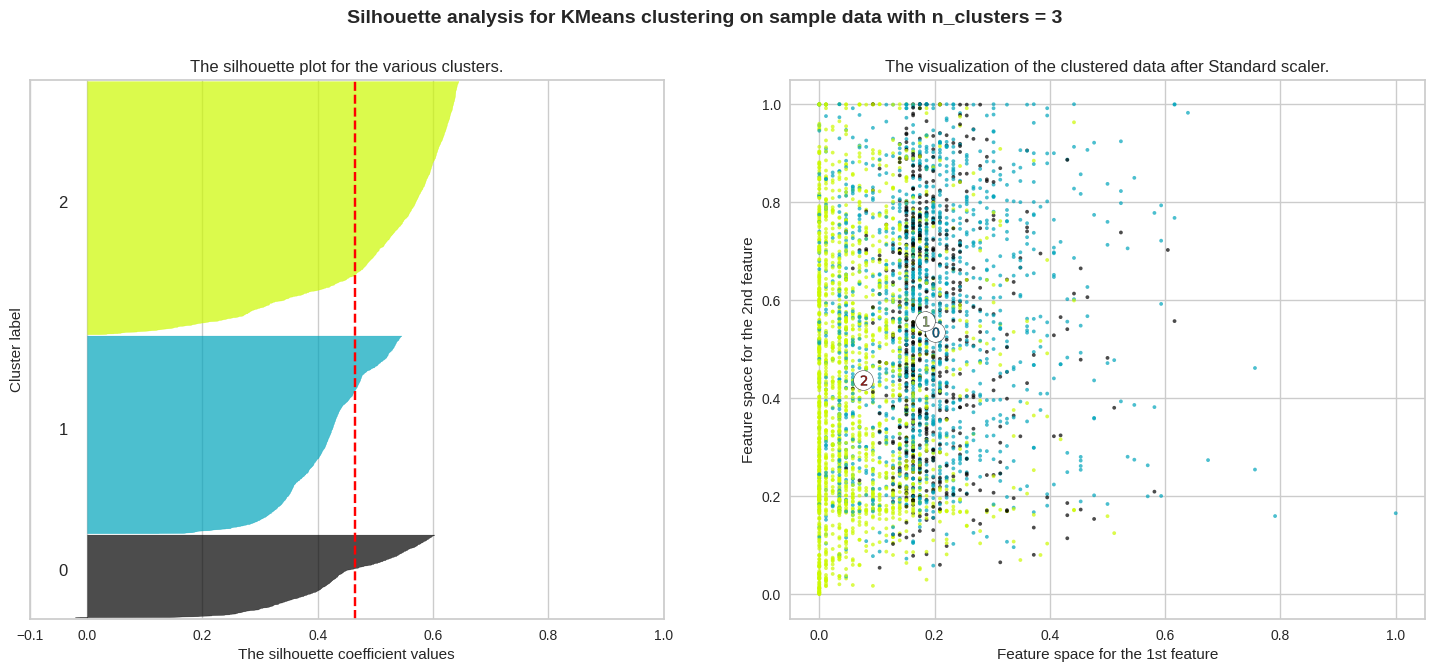

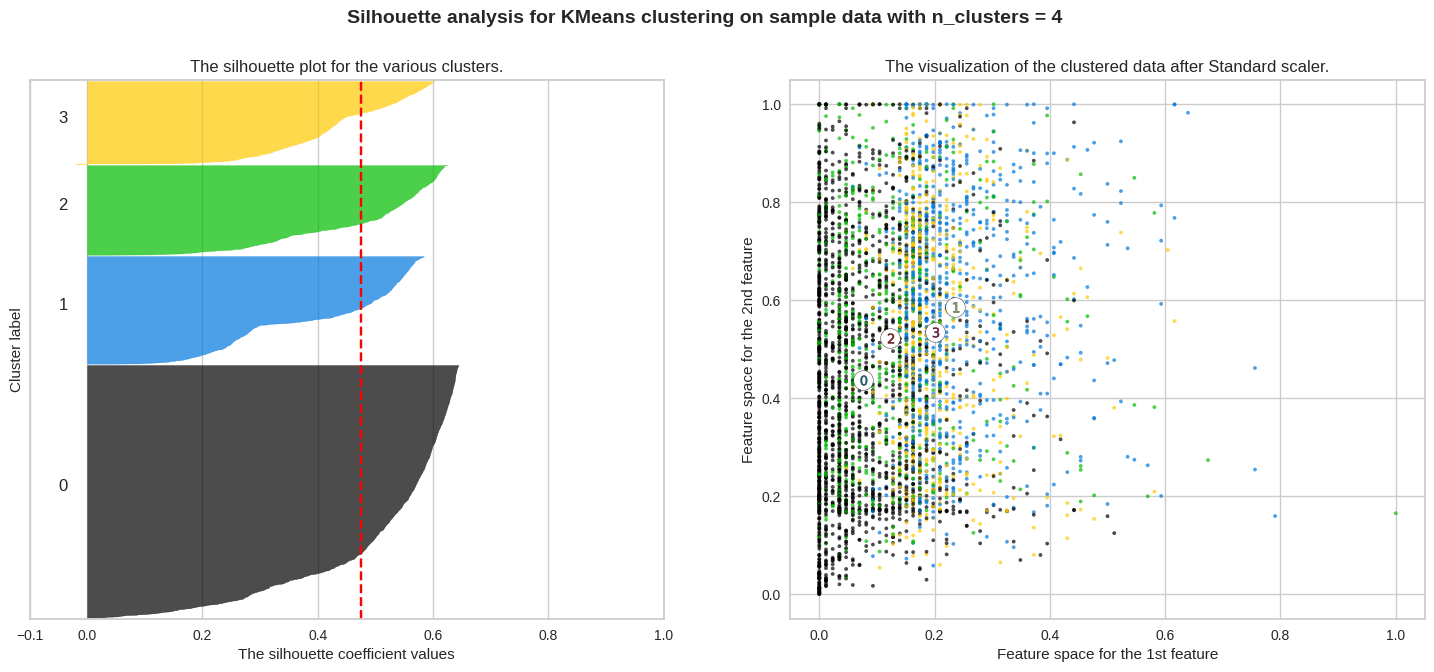

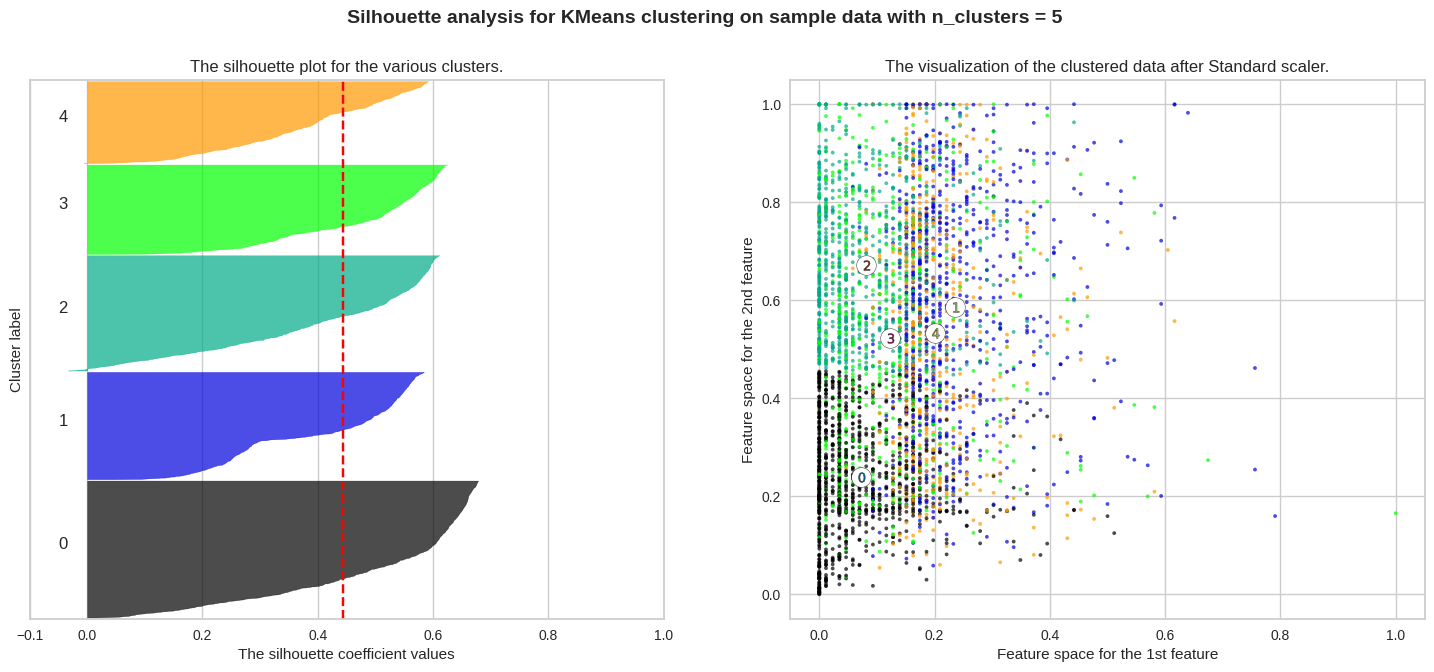

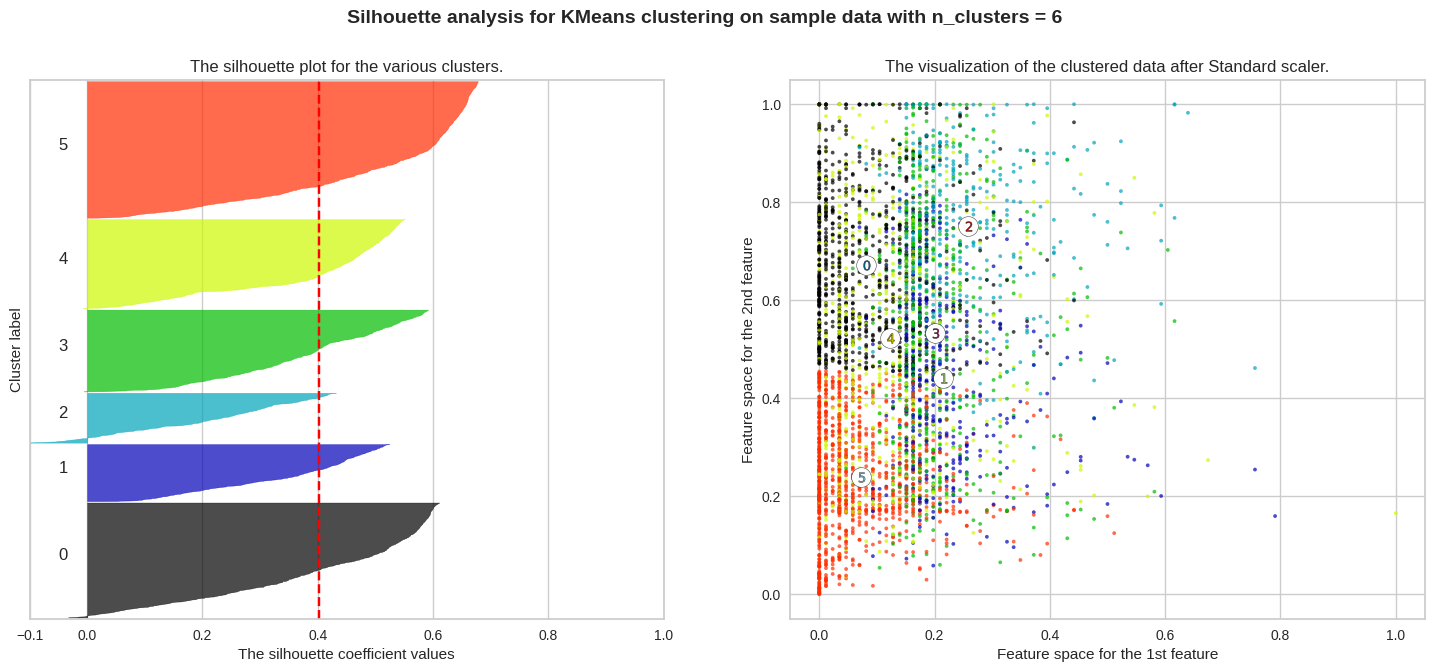

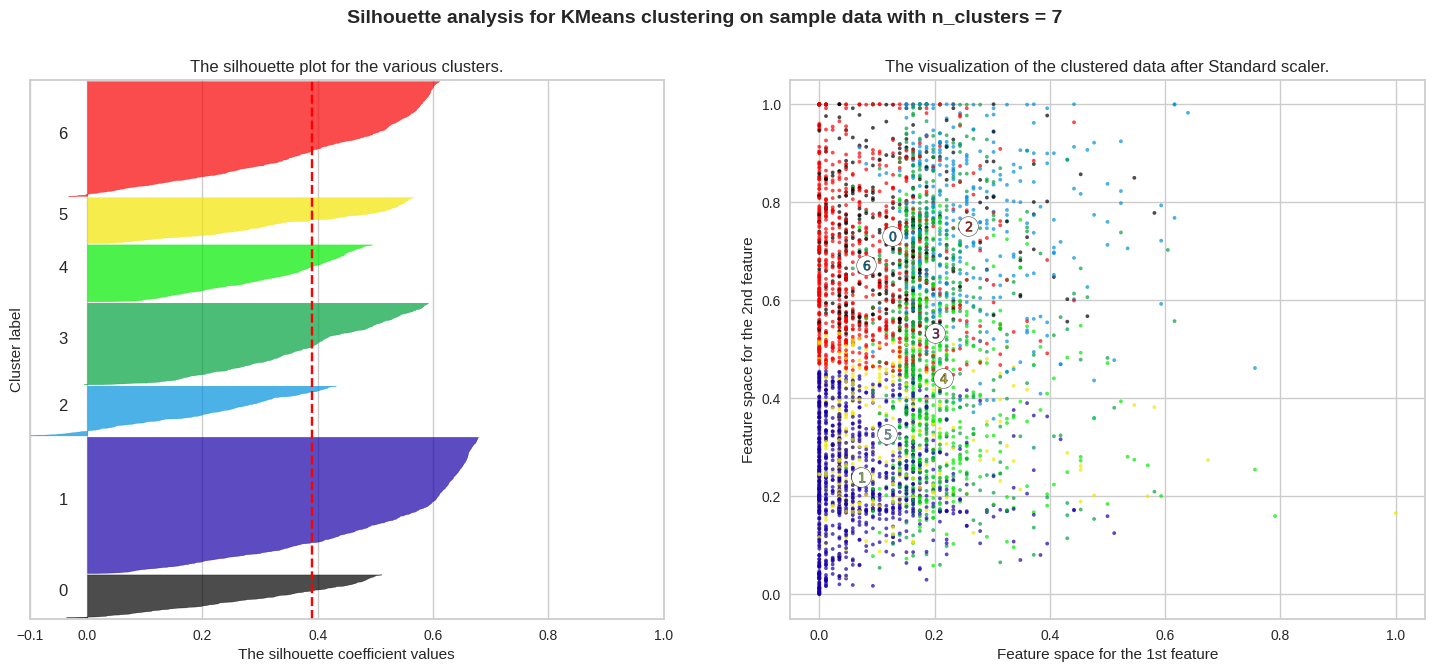

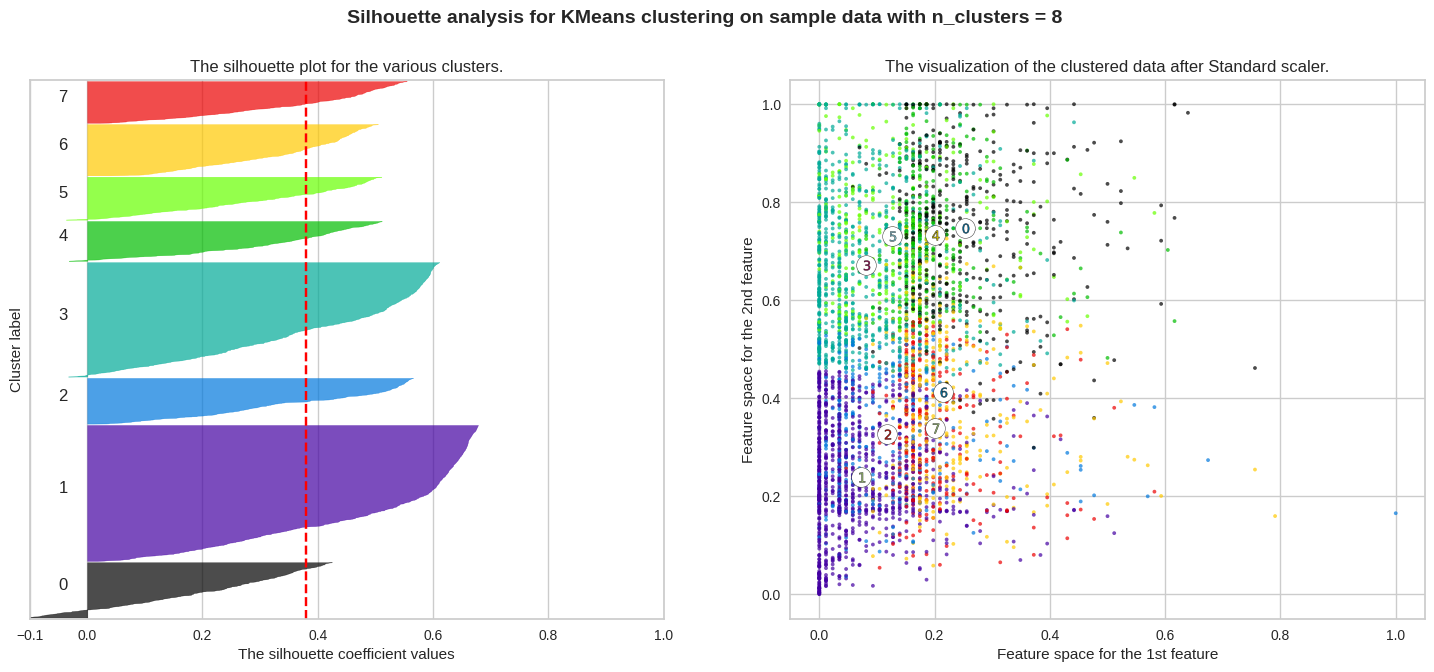

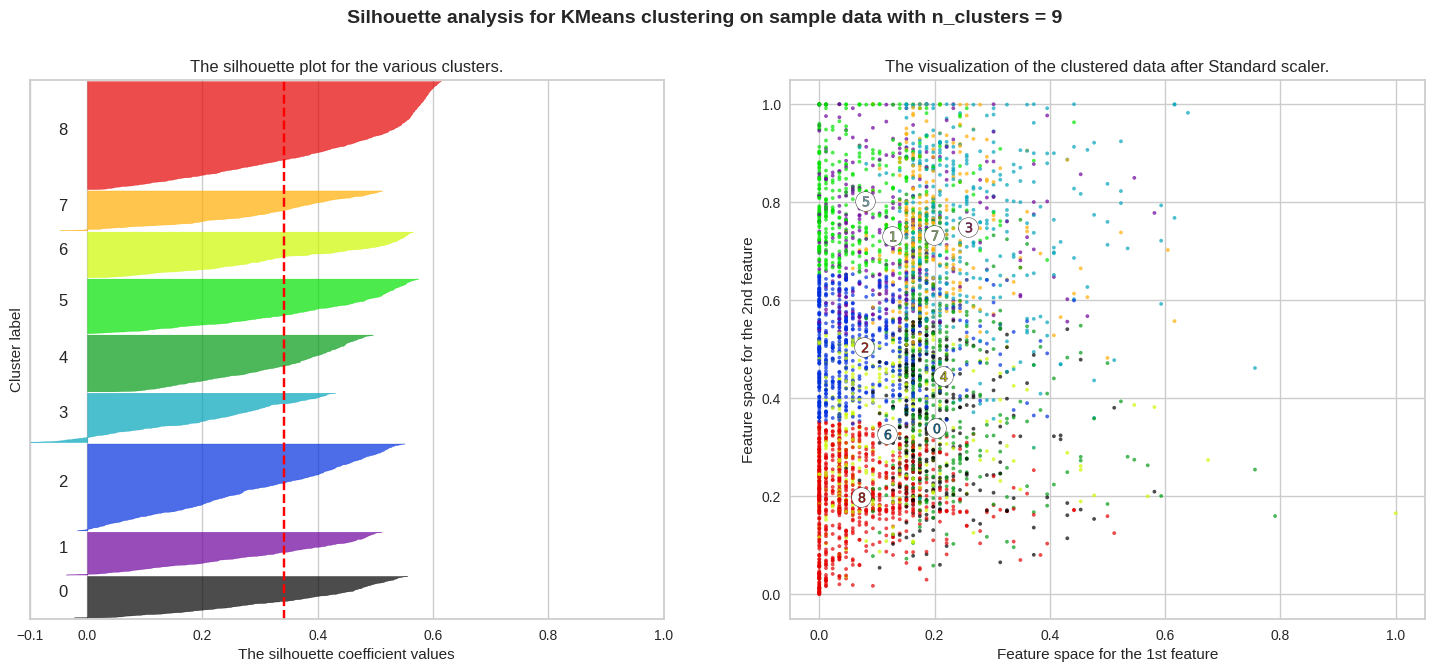

In [74]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(minmax_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(minmax_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(minmax_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(minmax_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(minmax_df[:,6], minmax_df[:,9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

According the the silhouette score of:

The MinMax Scaler Applied data, the ideal number of clusters is 2, with a score higher than other options, of 0.53, but if you notice the number of cluster 5 has also the best variation within cluster and between cluster with zero to no values going towards -1 and no mismatch in cluster segregation than the consecutive rest

If we check silhouette score with Normalize data kmeans model 0.53>0.32. Best score always close to +1.

In [ ]:
#  Build KMeans Cluster algorithm using K=2 and MinMaxScaler Applied Dataset

In [75]:
# we have found good number of cluster = 2
# model building using cluster numbers = 2

model_kmeans = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(minmax_df)
y_predict_kmeans.shape

(3998,)

In [76]:
# these are nothing but cluster labels...

y_predict_kmeans

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [77]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [78]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 5.69280197e-02,  2.15461508e-02,  4.15428764e-01,
         7.76502363e-03,  4.55773126e-03,  1.09621005e-01,
         1.83518364e-01,  2.78255837e-02,  4.90489598e-02,
         5.57398375e-01,  1.00000000e+00],
       [ 3.50949497e-02,  7.86125463e-03,  1.76400477e-01,
         6.95272149e-03,  2.18514104e-03,  3.88029372e-02,
         1.06355850e-01,  7.34601684e-03,  1.23162495e-02,
         4.60517912e-01, -6.99440506e-15]])

In [79]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster.
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

823.5583625482047

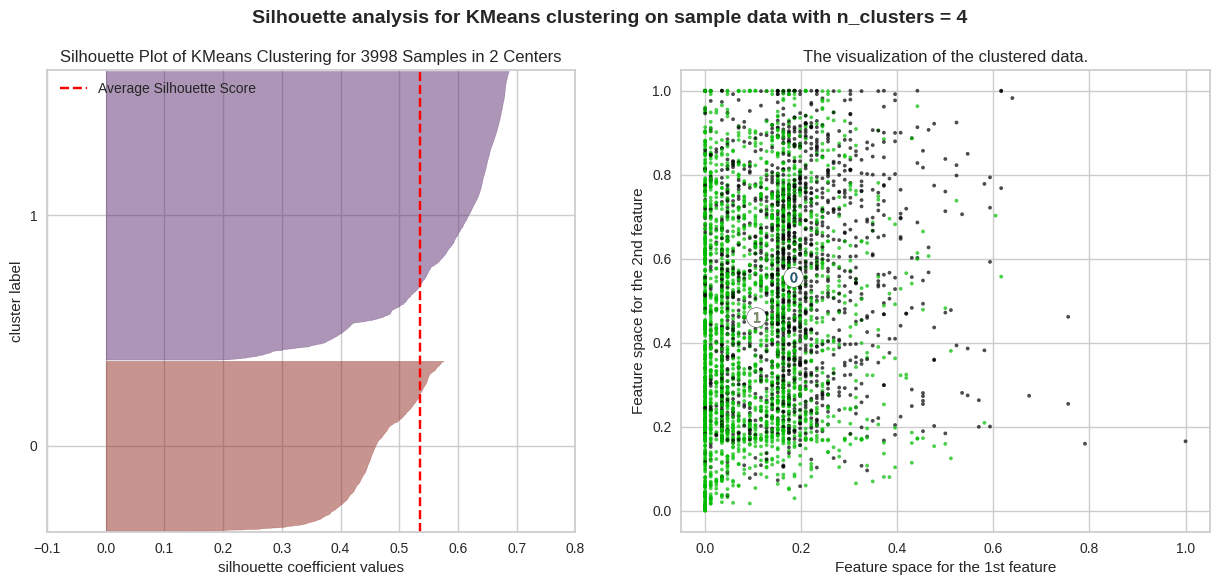

In [80]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a'])
sil_visualizer1.fit(minmax_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 2) # 2 is number of clusters
ax2.scatter(minmax_df[:, 6], minmax_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 4),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

In [ ]:
#  Hierarchical Clustering Algorithm

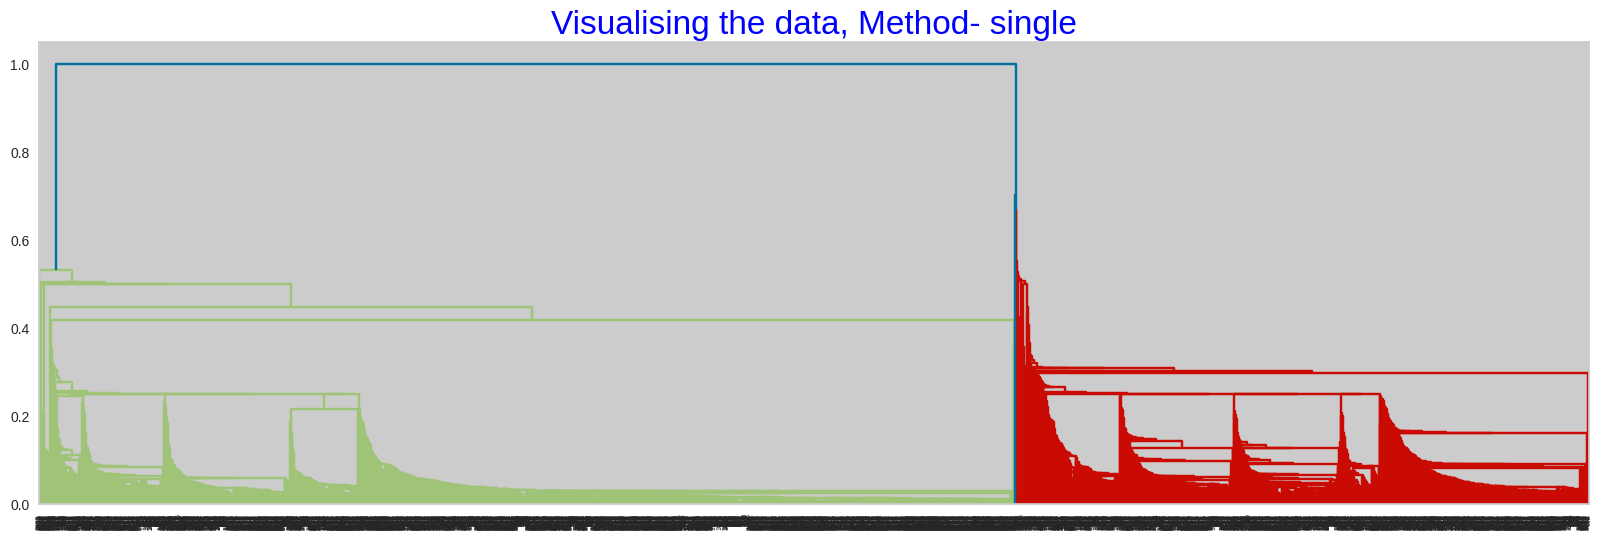

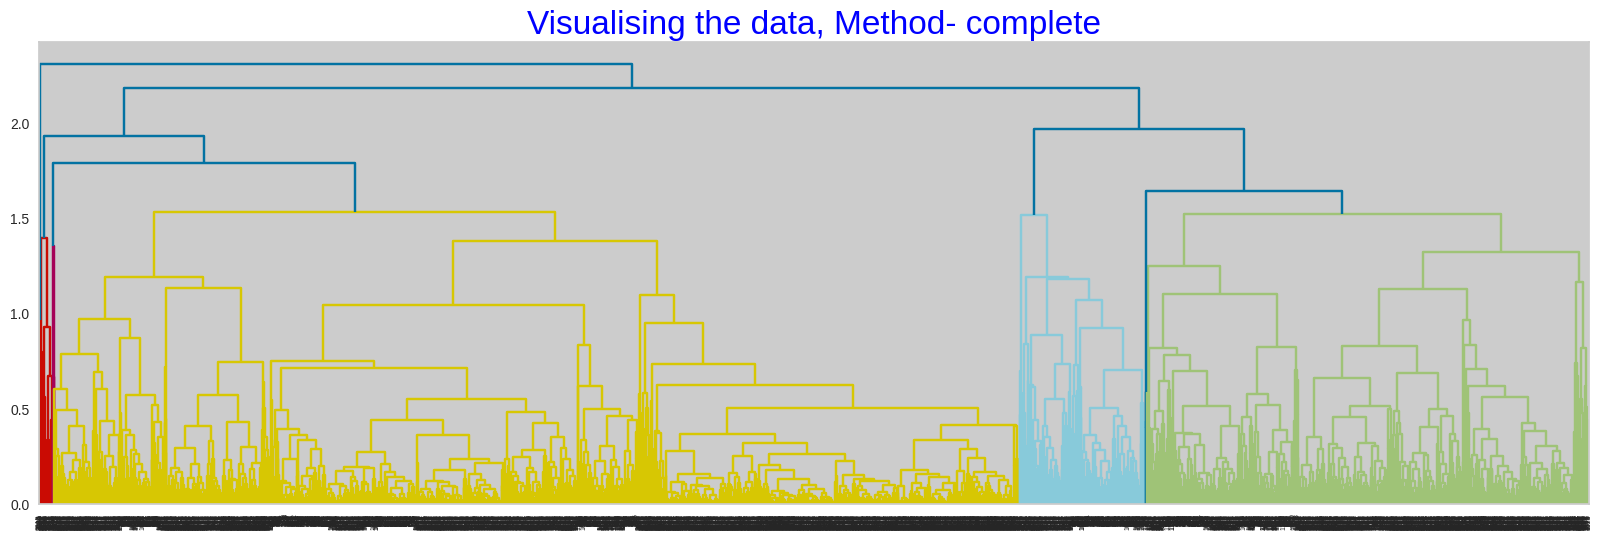

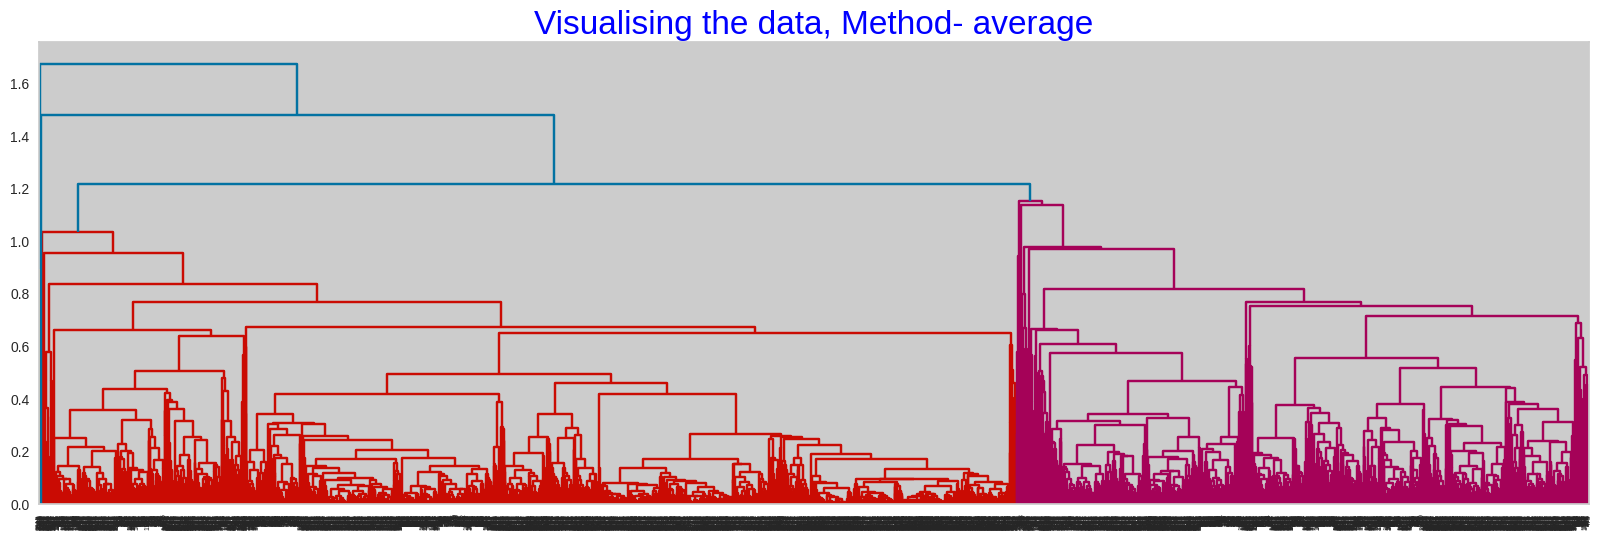

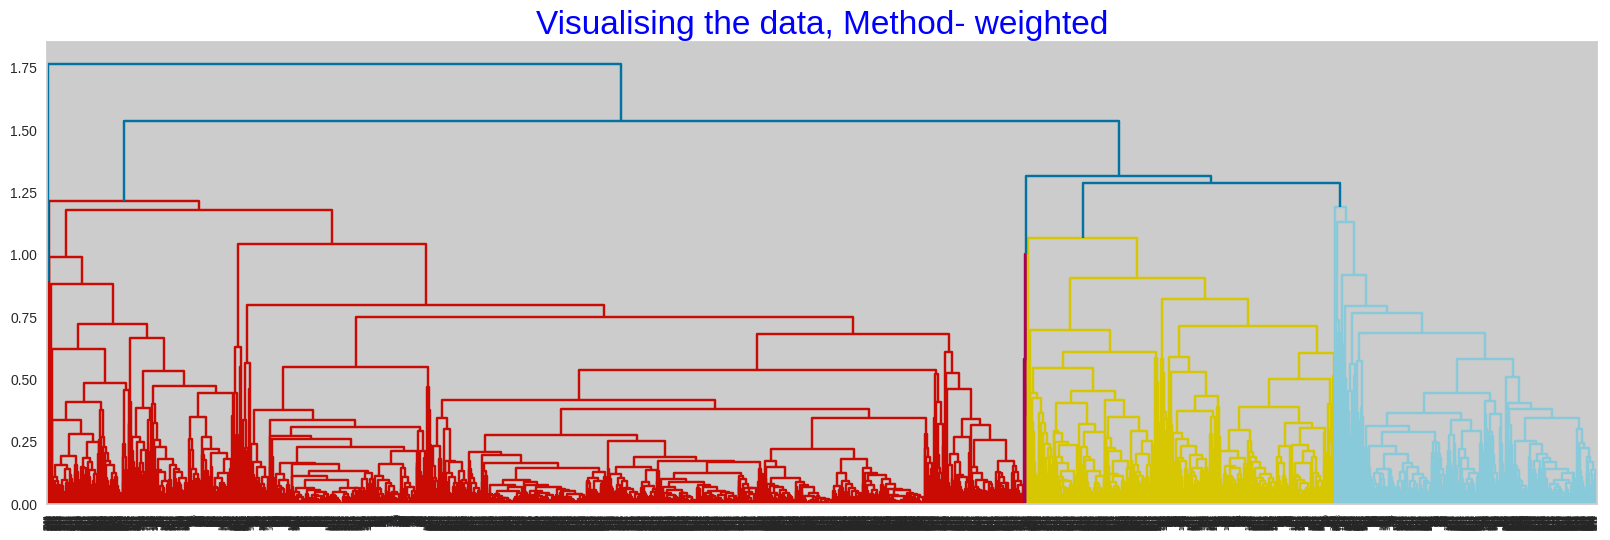

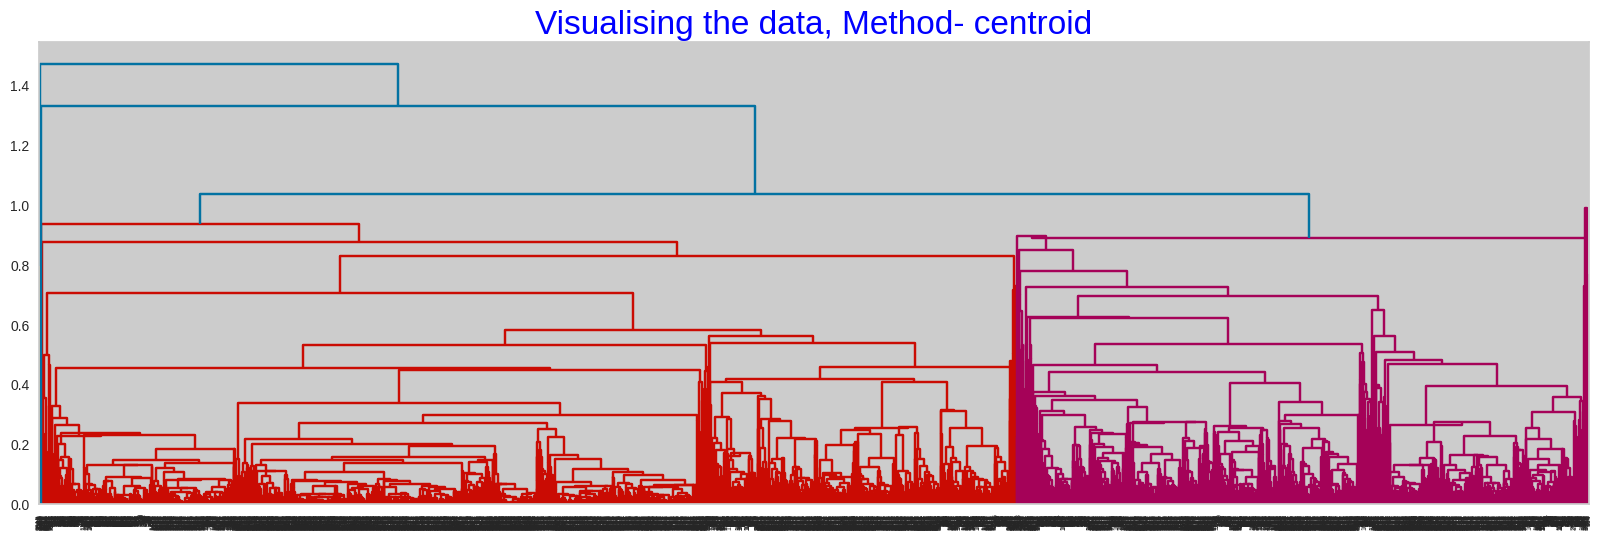

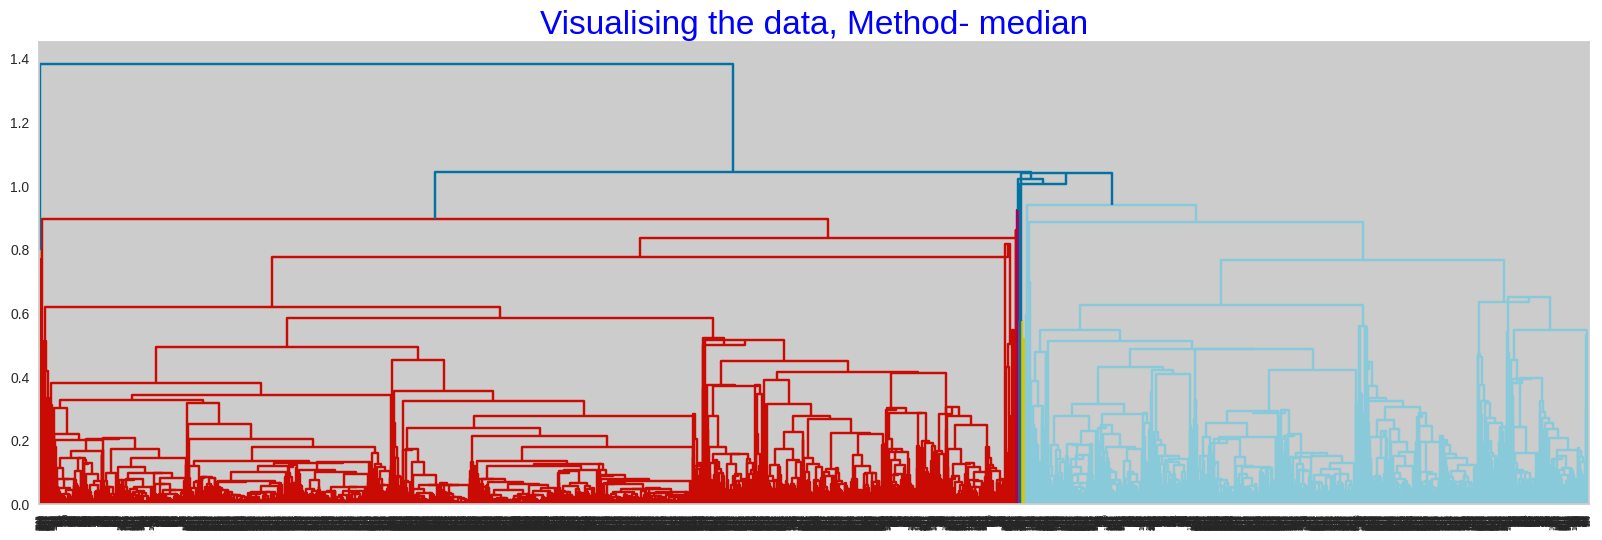

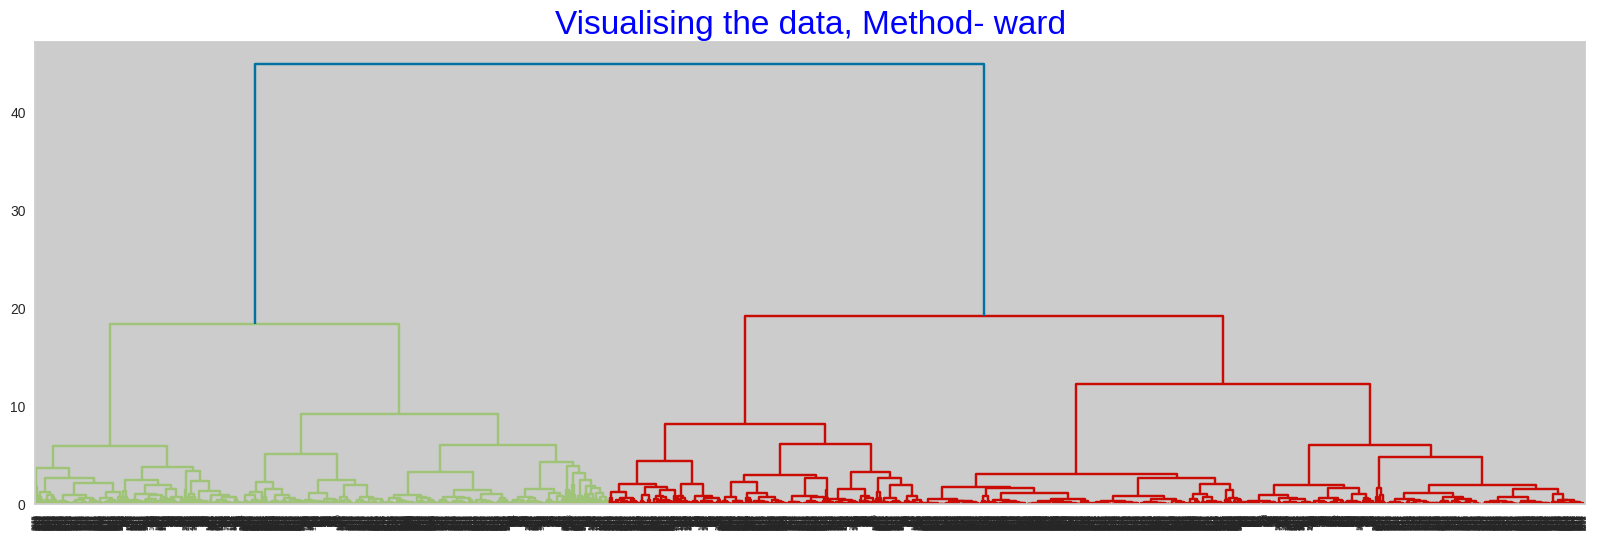

In [82]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))

    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [83]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

The seperation in Ward Method indicate that 2 is the optimal number for clusters.
Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [ ]:
# Dendrogram on Standard Scaler Applied on Data

In [84]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2891560488062143
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8110876003700274
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8110876003700274
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562622335599249

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2939395016802131
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760498283333268
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838424148089893
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350131896585496

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.308036175465823
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985292155693238
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7730785441296635
For n_

Conclusion: Max score is with cluster numbers 2 in standard scaler transformation and in Min Max scaler transformation.

Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

In [ ]:
# PCA

In [85]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [86]:
# eigenvalues..

print(pca_std.singular_values_)

[114.59929366  83.12095737  64.93711956  63.52257567  61.95910679
  60.39325992  56.7960262   49.8137685   37.95289819]


In [87]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[29.8626543  15.71034052  9.58849765  9.17530952  8.72920759  8.29356916
  7.33500521  5.64239286  3.27532512]


In [88]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([29.8626543 , 45.57299482, 55.16149247, 64.33680198, 73.06600957,
       81.35957873, 88.69458394, 94.3369768 , 97.61230192])

In [ ]:
# by applying PCA on standardized data with 95% variance it gives 9 PCA components.

In [ ]:
#  Silhouette Score method for PCA Standard Scaled Data

In [89]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.19961390517290717
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8108617312271154
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8108617312271154
For n_clusters = 2 The average silhouette_score with linkage- single : 0.738309454714575

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.21104413292128169
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7783994853820995
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7857918595410374
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7380319163788157

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.21497866326071854
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6685293540610888
For n_clusters = 4 The average silhouette_score with linkage- average : 0.775442673464243
For 

In [ ]:
# Run Hierarchical Clustering.(Agglomerative Clustering)

In [91]:
ag=AgglomerativeClustering()

In [92]:
y_pred_hie = ag.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3998,)


array([1, 1, 1, ..., 0, 1, 1])

In [94]:
# Cluster numbers

ag.n_clusters_

2

In [95]:
# Clustering Score

(sil(pca_std_df, ag.labels_)*100).round(3)

19.961

In [ ]:
#   Running PCA of MinMaxscalar data.

In [101]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [102]:
# eigenvalues..

print(pca_minmax.singular_values_)

[32.61283384 20.38274997 14.94964196  6.55127594]


In [103]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[58.10519044 22.69673608 12.20954379  2.34471271]


By applying PCA on MinMaxscalr transformation data gives 4 PCA component

In [ ]:
#  Silhouette Score method for PCA MinMax Scaled Data

In [104]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_minmax_df)
        silhouette_score2 = sil(pca_minmax_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5570203113320761
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.45062835604506774
For n_clusters = 2 The average silhouette_score with linkage- average : 0.47467208868332433
For n_clusters = 2 The average silhouette_score with linkage- single : 0.5570203113320761

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4668018757689699
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5527079342536563
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5545201621845232
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5557695658754247

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.46052119232965977
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.509491332840777
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4979294044354528
For

Max score is with cluster numbers 2 for ward and mostly others.

In [ ]:
#  Run Hierarchical Clustering.(Agglomerative Clustering)

In [105]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(3998,)


array([0, 0, 0, ..., 1, 0, 0])

In [106]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [107]:
# Clustering Score

(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

55.702

In [ ]:
# DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

In [ ]:
# DBSCAN of Standard Scaled Data

In [110]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [111]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

In [ ]:
#  Collecting number of generated clusters.

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


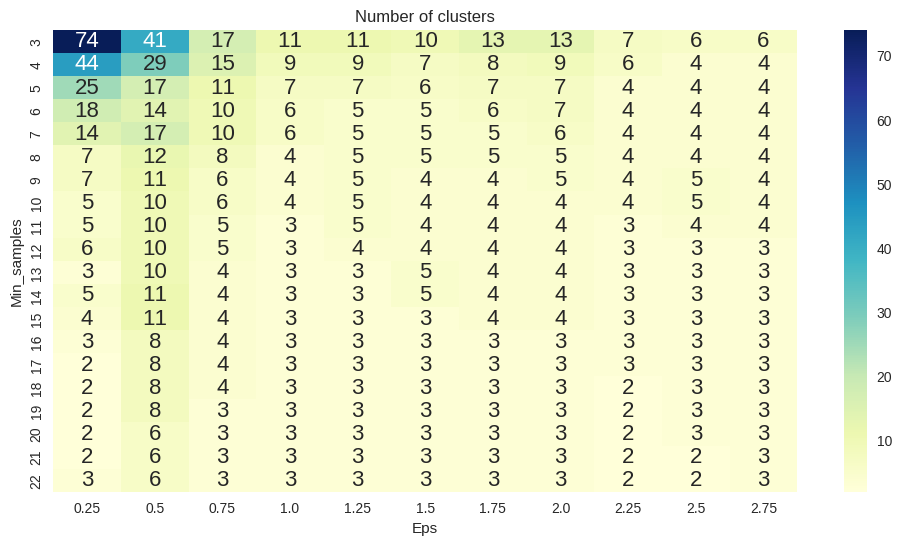

In [112]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 74 to 2.

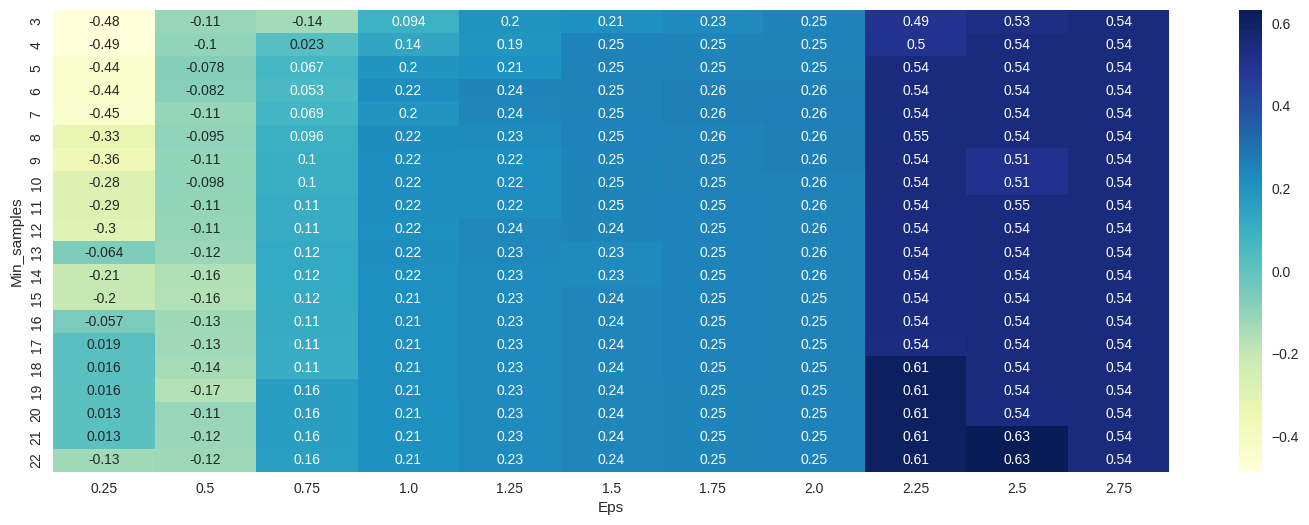

In [113]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22

In [114]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [115]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [116]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# -1 are the noise points in our dataset and the rest are the clusters
# Concating Labels with main dataset copy

In [118]:
data['DBSCAN_labels'] = dbscan.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1     28143           0          1          1          1          174   
2     19244           0          1          1          1          215   
3     41354           0          1          1          1         4123   
4     14776           0          1          1          1          500   
5     97752           0          4          1          1        43300   

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1             1                  0                0               7000      0   
2             2                  0                0               6968      0   
3             4                  0                0               7034      0   
4             1                  0                0               6952      0   
5            26               2077                4               6935      1   

    Kmeans_label  DBSCAN_labels  
ID                               
1              2              0  
2              2              0  
3              2              0  
4              2              0  
5              1              0

In [119]:
data.groupby('DBSCAN_labels').agg(['mean'])

Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                        mean         mean      mean      mean      mean   
DBSCAN_labels                                                             
-1             211990.889423  1522.576923  2.509615  1.278846  1.235577   
 0              66025.489182    68.500792  2.035092  1.000000  1.000000   

                Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                       mean        mean              mean            mean   
DBSCAN_labels                                                               
-1             45335.081731   24.754808       3276.389423        9.548077   
 0             15602.254090   10.883113        305.613193        0.925330   

              Days_since_enroll     Award Kmeans_label  
                           mean      mean         mean  
DBSCAN_labels                                           
-1                  4768.596154  0.687500     2.038462  
 0                  4083.549868  0.353034     1.662005

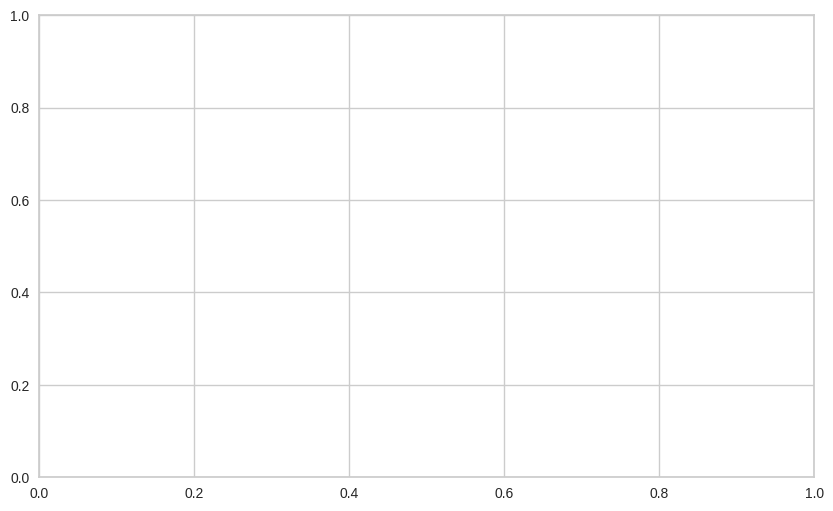

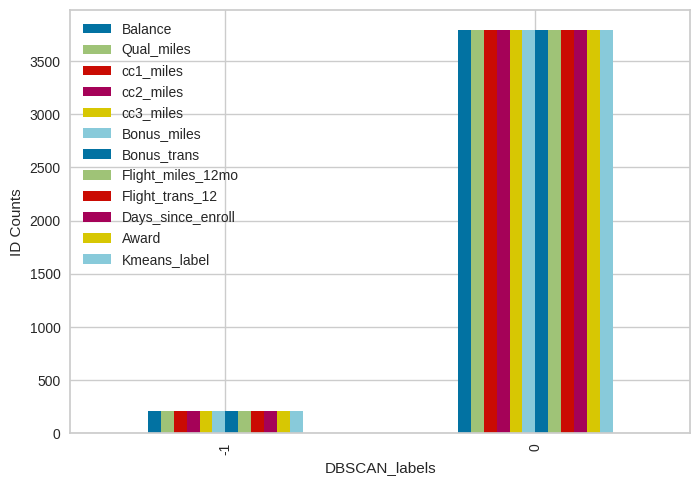

In [125]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['DBSCAN_labels']).count().plot(kind='bar')
plt.ylabel('ID Counts')




plt.show()

In [ ]:
#  DBSCAN on MinMax Scaled Data

In [126]:
from itertools import product

eps_values = np.arange(0.25,1.25,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [127]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(minmax_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(minmax_df, DBS_clustering.labels_))

In [ ]:
#  Collecting number of generated clusters.

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


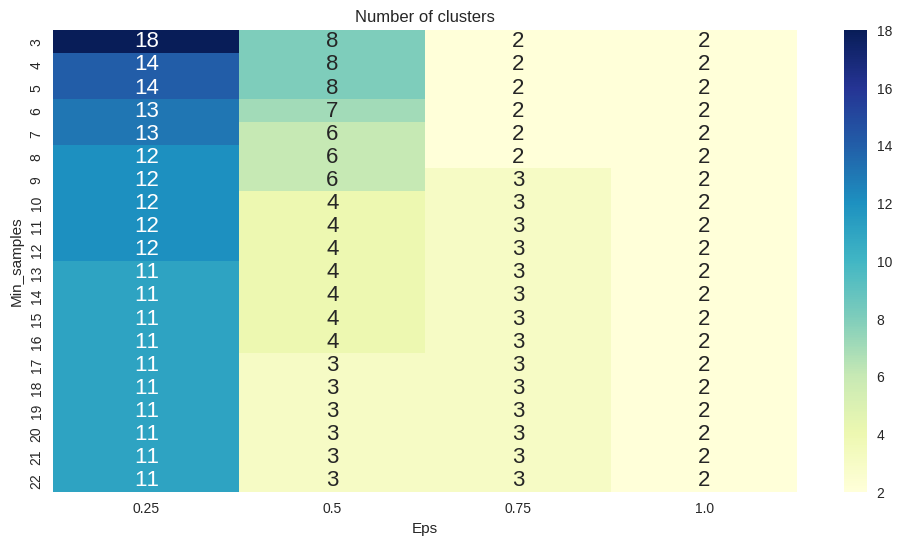

In [128]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 18 to 2.

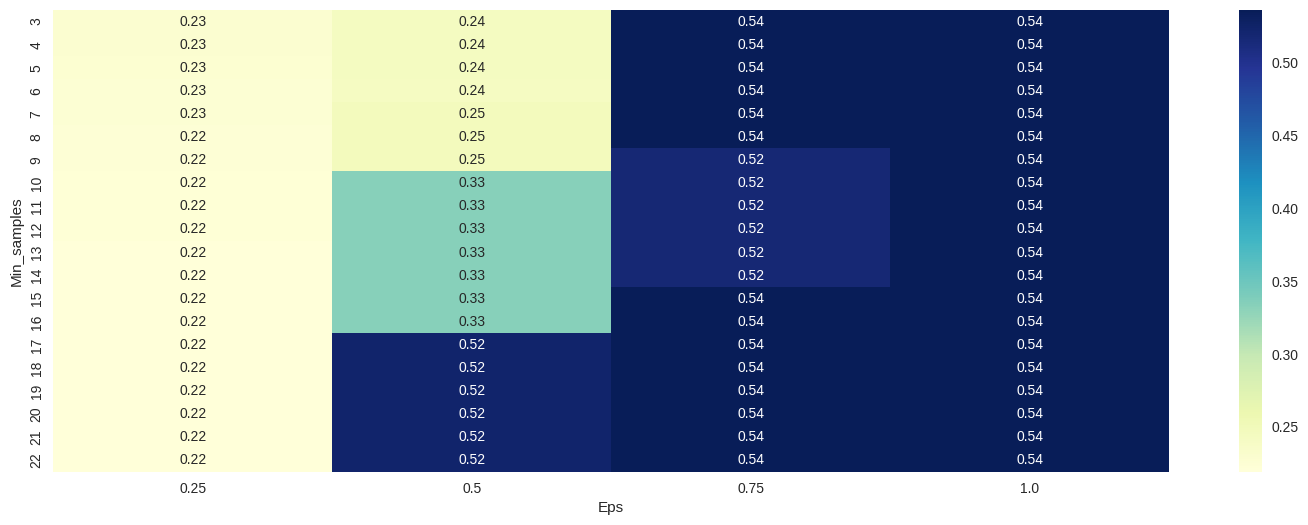

In [129]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [ ]:
#  Global maximum is 0.54 for eps=1.0 and min_samples=from 22 to 3

In [130]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


In [131]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [3,4,5,6,7,8,9,10,11]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        #cluster_labels=dbscan.fit_predict(data)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.75 
min_sample= 3 
number of clusters= 2 
average silhouette score= 0.5359


In [ ]:
#  Run DBSCAN on MinMax Scaled data with optimal min_sample and epsilon values

In [132]:
dbscan = DBSCAN(eps=1, min_samples=22) # min_samples = number of clumns * 3
dbscan.fit(minmax_df)

DBSCAN(eps=1, min_samples=22)

In [133]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# -1 are the noise points in our dataset and the rest are the clusters

In [135]:
# Concating Labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1     28143           0          1          1          1          174   
2     19244           0          1          1          1          215   
3     41354           0          1          1          1         4123   
4     14776           0          1          1          1          500   
5     97752           0          4          1          1        43300   

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1             1                  0                0               7000      0   
2             2                  0                0               6968      0   
3             4                  0                0               7034      0   
4             1                  0                0               6952      0   
5            26               2077                4               6935      1   

    Kmeans_label  DBSCAN_labels  
ID                               
1              2              0  
2              2              0  
3              2              0  
4              2              0  
5              1              1

In [136]:
data.groupby('DBSCAN_labels').agg(['mean'])

Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                       mean        mean      mean      mean      mean   
DBSCAN_labels                                                           
0              59831.203814   87.637267  1.705602  1.013905  1.008741   
1              97053.051317  240.196489  2.661715  1.015530  1.018231   

                Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                       mean        mean              mean            mean   
DBSCAN_labels                                                               
0              10231.752483    9.146603        226.382201        0.652761   
1              28905.414585   15.782579        857.501013        2.599595   

              Days_since_enroll Award Kmeans_label  
                           mean  mean         mean  
DBSCAN_labels                                       
0                   3821.535558   0.0     1.851808  
1                   4625.062120   1.0     1.392302

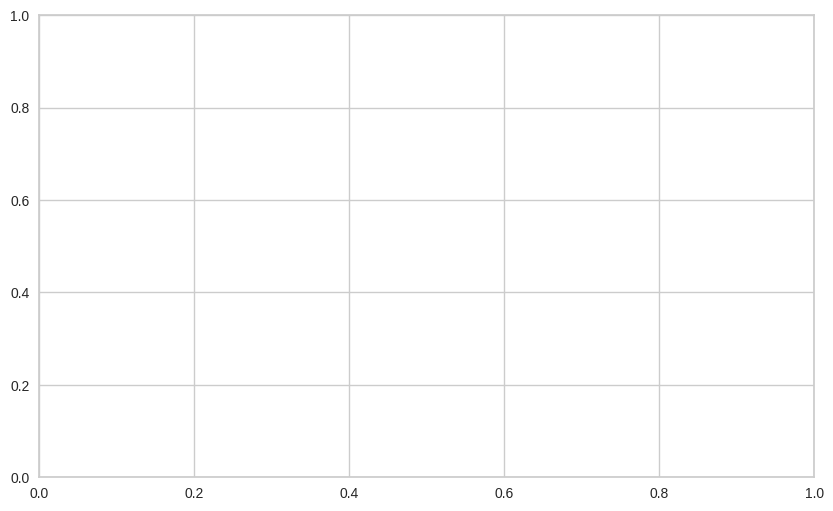

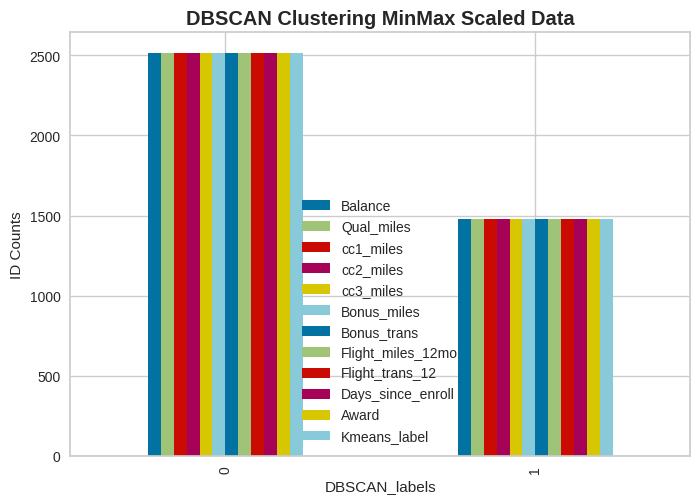

In [140]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['DBSCAN_labels']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering MinMax Scaled Data',fontsize='large',fontweight='bold')

plt.show()

In [ ]:
# In cluster number 0 & 1 there are more customers. Need to focus on cluster 0 & 1.

In [143]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(data.loc[data.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data.loc[data.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [144]:
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

Cluster1_avg  Cluster2_avg
Balance            59831.203814  97053.051317
Qual_miles            87.637267    240.196489
cc1_miles              1.705602      2.661715
cc2_miles              1.013905      1.015530
cc3_miles              1.008741      1.018231
Bonus_miles        10231.752483  28905.414585
Bonus_trans            9.146603     15.782579
Flight_miles_12mo    226.382201    857.501013
Flight_trans_12        0.652761      2.599595
Days_since_enroll   3821.535558   4625.062120
Award                  0.000000      1.000000
Kmeans_label           1.851808      1.392302
DBSCAN_labels          0.000000      1.000000

As decided need to focous on first two clusters.. Considering past Award status(0 or 1) cluster number2 shows award avg as 1 that means people awarded with scheme. Similarly for cluster number 2 award avg. is 0. Since avg is low that means now maximim award given to cluster number1 in the past. Need to add future schemes for cluster number two members on different bonus points & different card transaction bonus.

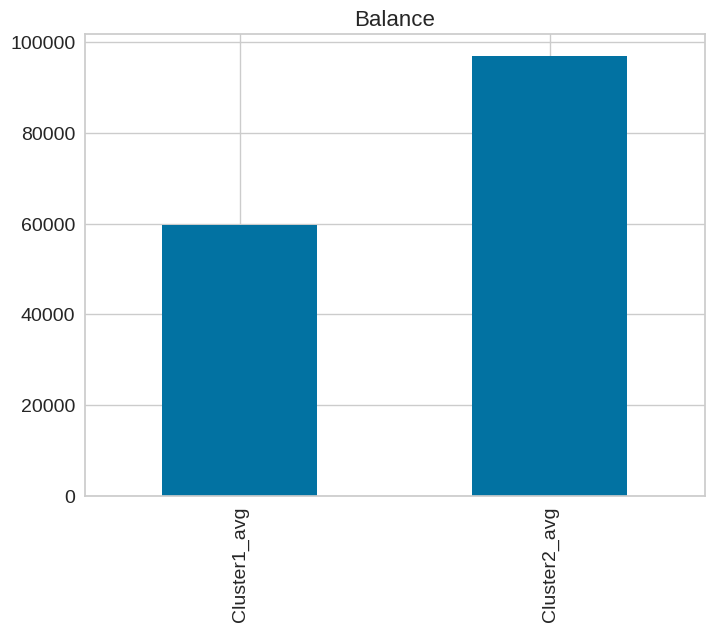

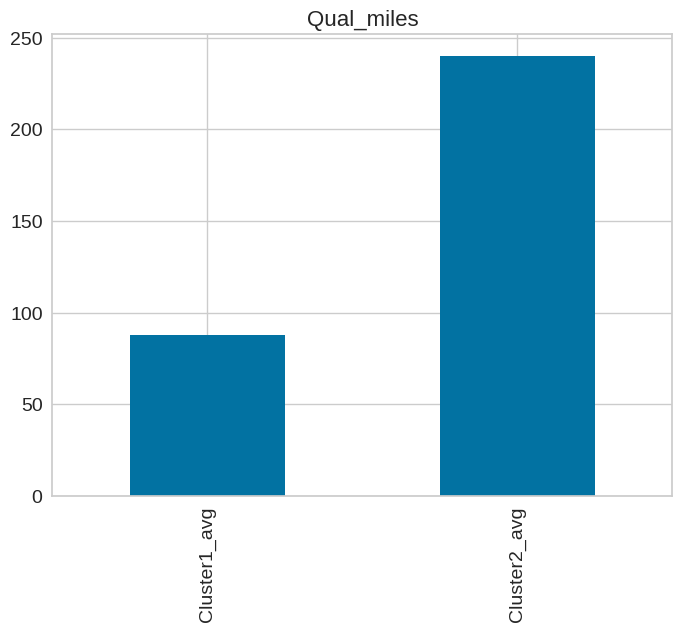

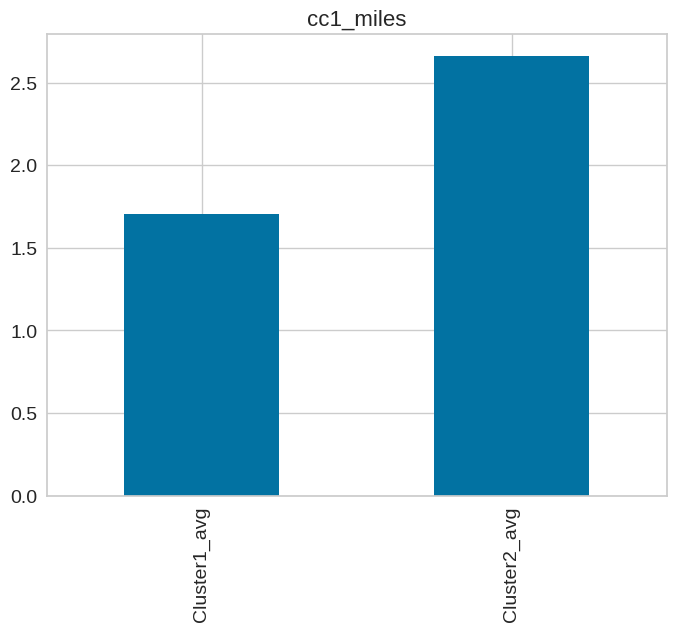

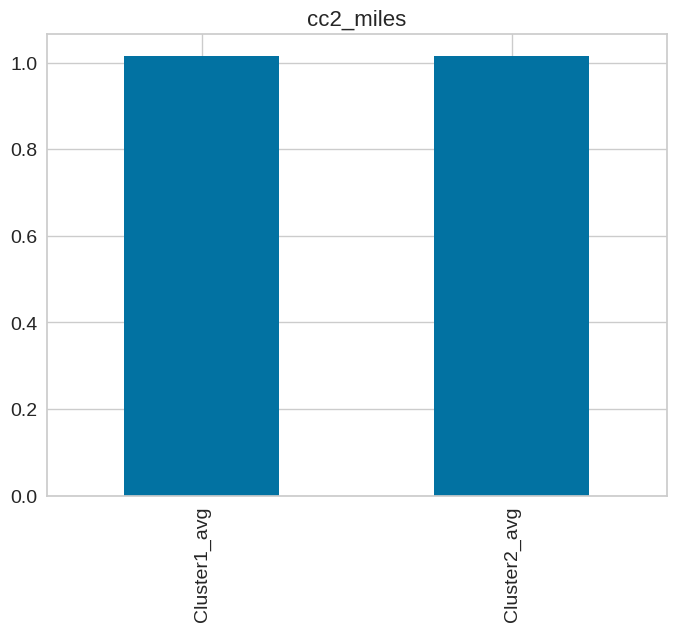

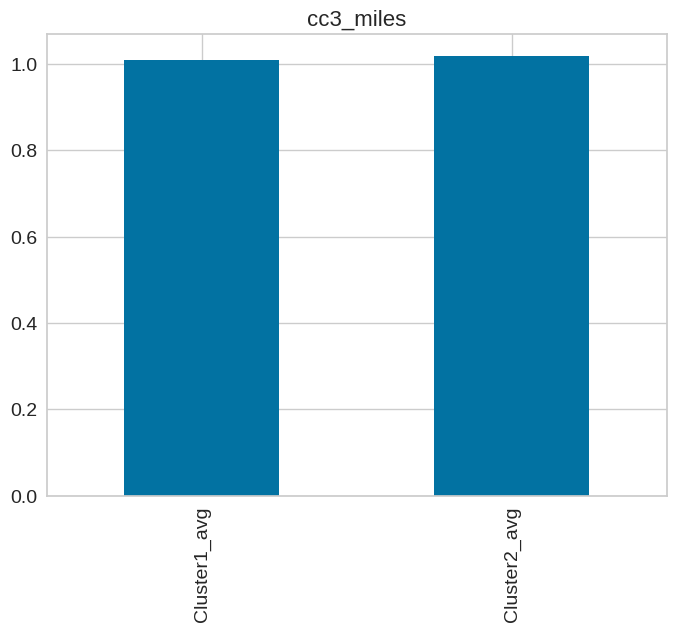

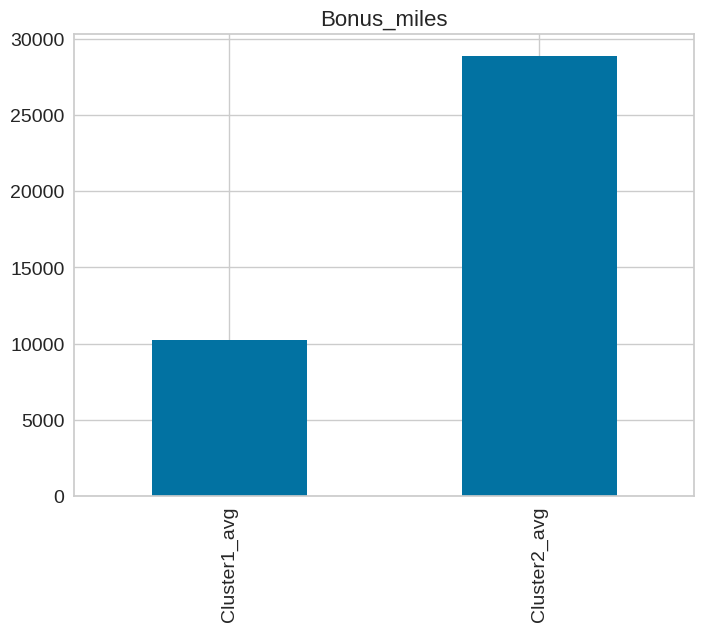

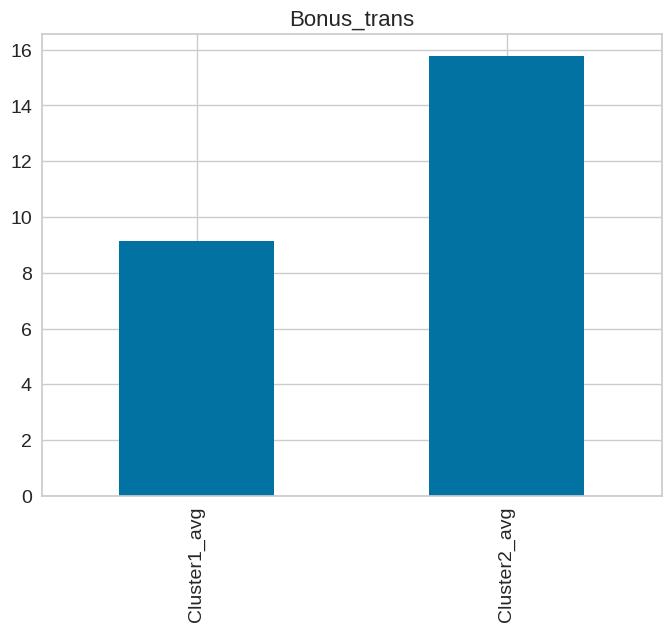

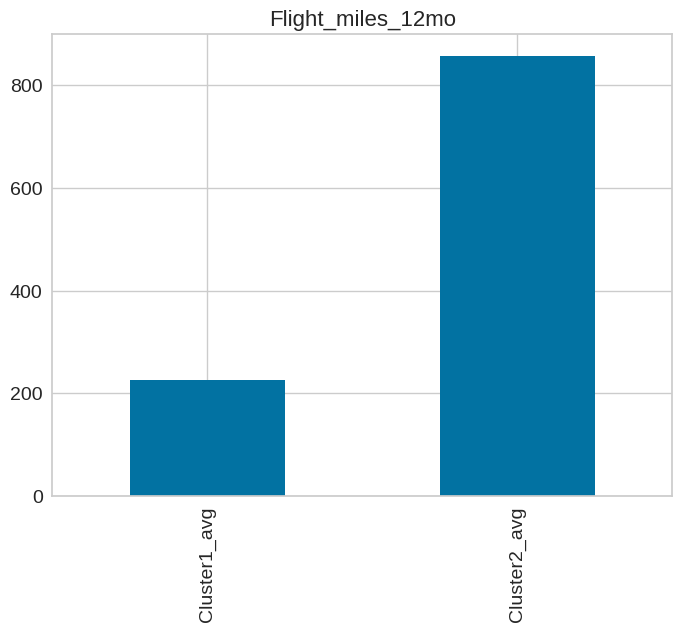

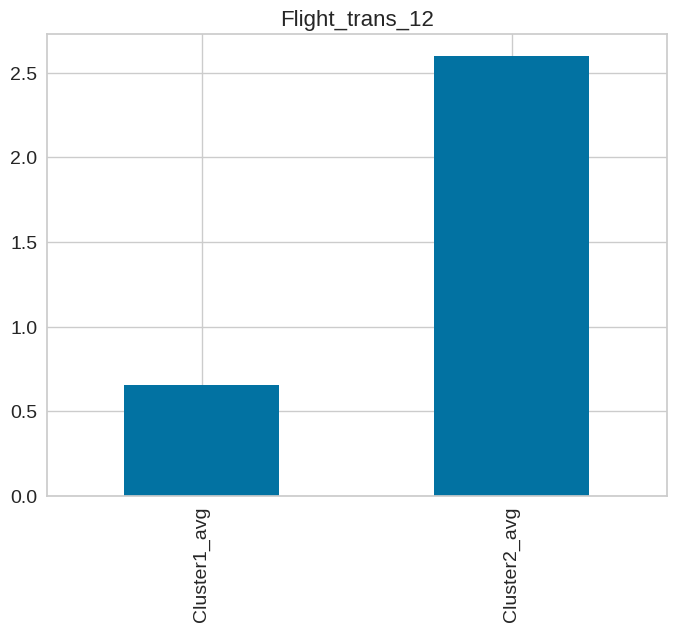

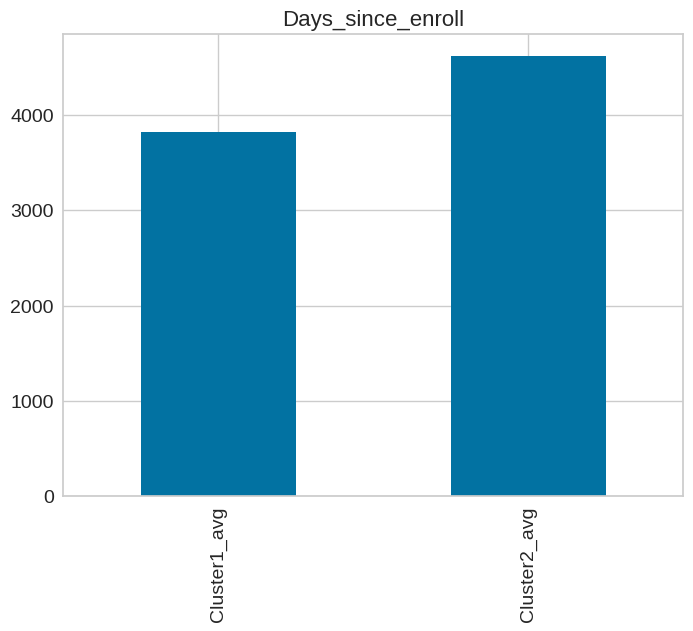

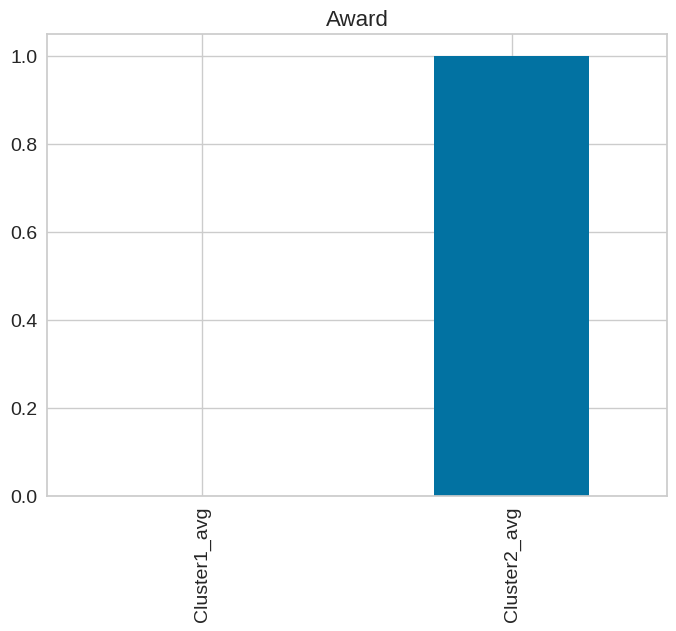

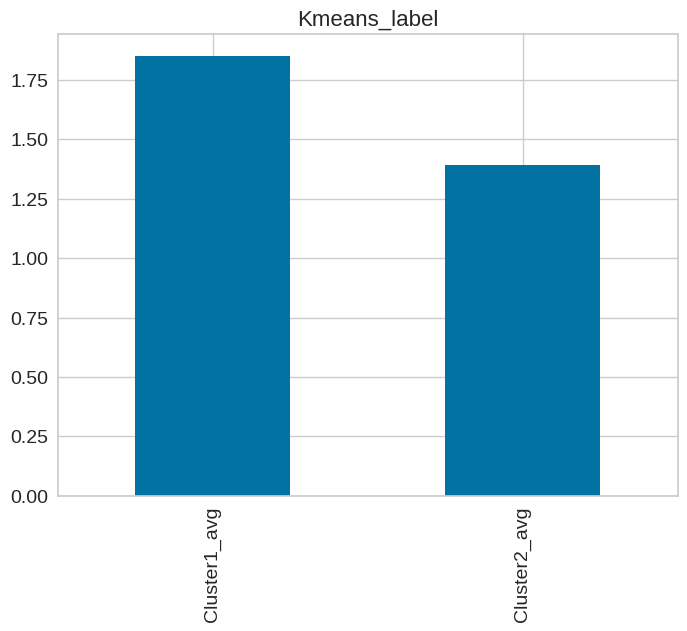

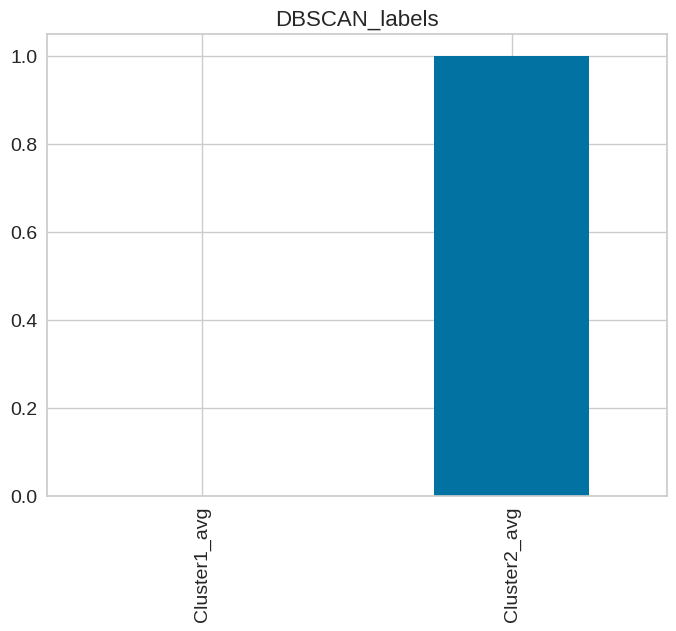

In [145]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.
By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.
KMeans clustering is sensitive to outliers